In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA,KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import tensorflow as tf
import keras
from keras import layers
from keras.callbacks import EarlyStopping
from zipfile import ZipFile

In [5]:
filename="archive(2).zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print("done")

done


In [6]:
train_df = pd.read_csv("/content/archive(2)/train.csv")
test_df = pd.read_csv("/content/archive(2)/test.csv")



In [7]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
# preprocessing
print("number of null values:",train_df.isnull().sum().sum())
print("number of null values",test_df.isnull().sum().sum())



number of null values: 0
number of null values 0


In [9]:
train_features = train_df.drop(["Activity", "subject"], axis=1)
test_features = test_df.drop(["Activity", "subject"], axis=1)

train_labels = train_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],  [0, 1, 2, 3, 4, 5])
test_labels = test_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'],  [0, 1, 2, 3, 4, 5])

print(train_features.shape)
print(test_features.shape)

print(train_labels.shape)
print(test_labels.shape)


(7352, 561)
(2947, 561)
(7352,)
(2947,)


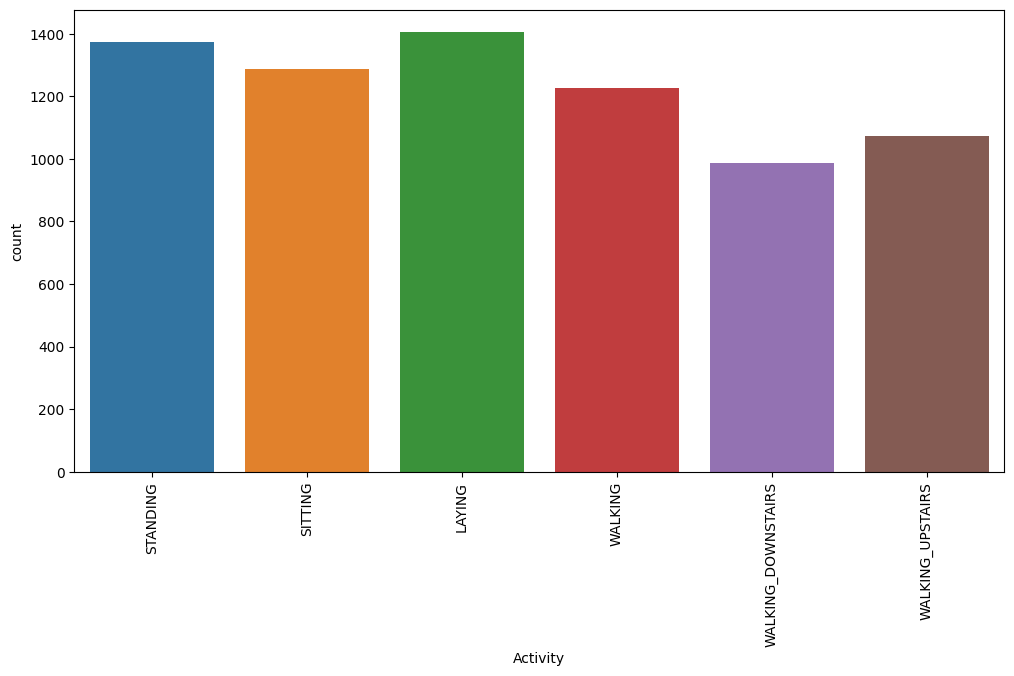

In [10]:

plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=train_df)
plt.xticks(x=train_df['Activity'],rotation='vertical')
plt.show()

In [11]:
# the data is balanced

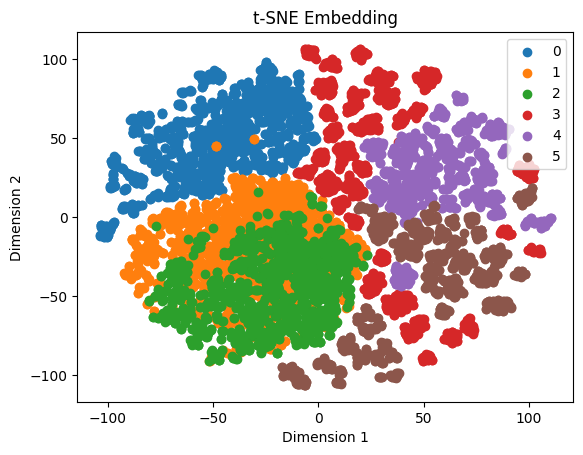

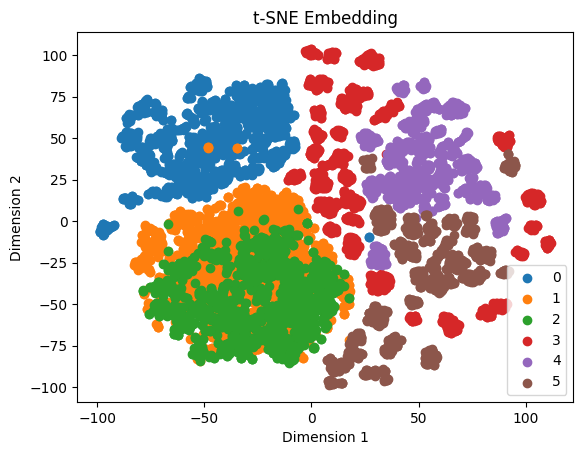

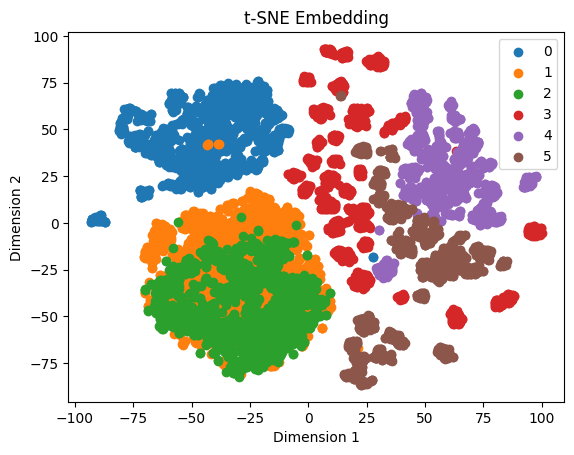

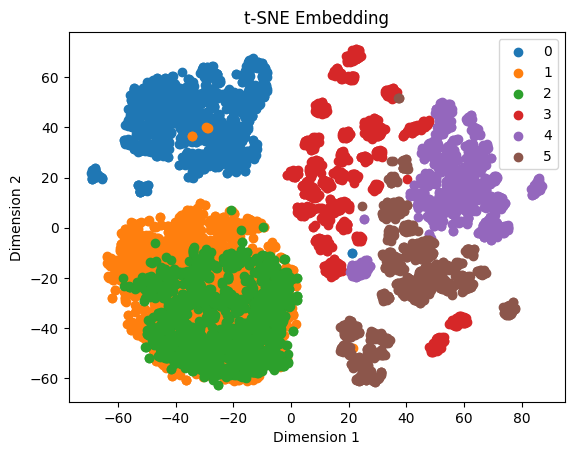

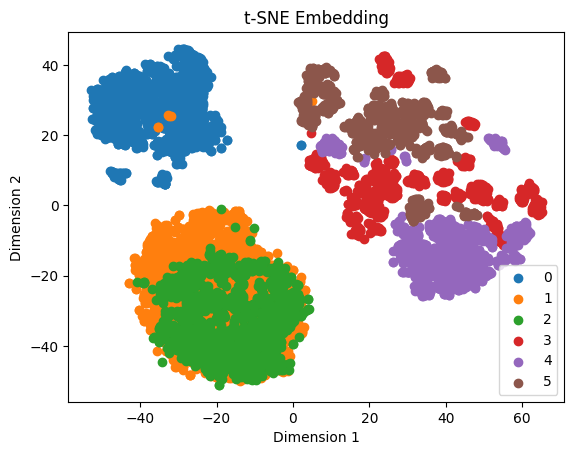

In [12]:
preplexities=[5,10,20,40,100]
for i in preplexities:


    # Create a t-SNE instance with desired parameters
    tsne = TSNE(n_components=2, perplexity=i, learning_rate=200.0, n_iter=1000, random_state=42)

    # Perform t-SNE dimensionality reduction
    X_embedded = tsne.fit_transform(train_features)

    # Plot the t-SNE embedding with different colors for each class
    unique_labels = np.unique(train_labels)
    for label in unique_labels:
        plt.scatter(X_embedded[train_labels == label, 0], X_embedded[train_labels == label, 1], label=str(label))

    plt.title('t-SNE Embedding')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

In [13]:
# we can obsreve that except green and orange rest of the classes are well seperated

In [14]:
X_train=train_features
y_train=train_labels

X_test=test_features
y_test=test_labels

In [15]:

def confussion_matrix(labless,predicted_lables):
    confusionMatx=confusion_matrix(labless,predicted_lables)

    sns.set(font_scale=1.5)

    labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt= ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params (labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    print("-"*50)






In [16]:
#dimensionality reduction


pca=PCA(n_components=0.95)
kpca=KernelPCA(n_components=9,kernel='rbf')
lda = LinearDiscriminantAnalysis(n_components=5)

pca.fit(X_train)
kpca.fit(X_train)
lda.fit(X_train,y_train)




LinearDiscriminantAnalysis(n_components=5)

In [17]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_train_kpca=kpca.transform(X_train)
X_test_kpca=kpca.transform(X_test)
X_train_lda=lda.transform(X_train)
X_test_lda=lda.transform(X_test)

In [18]:
train=[X_train,X_train_pca,X_train_kpca,X_train_lda]
test=[X_test,X_test_pca,X_test_kpca,X_test_lda]

In [19]:

modelss=[]
accuracy_per_model=[]
pre_per_model=[]
re_per_model=[]
f1_per_model=[]

def apply_model(cross_val,train,test,y_train,y_test,model_name):

    word=["normal dataset","Pca reduced dataset","Kernel Pca reduced data set","LDA reduced dataset"]
    for i in range(0,4):
        print("results for ",word[i],":")
        print("-"*25)
        cross_val.fit(train[i], y_train)
        predicted_points = cross_val.predict(test[i])

        accuracy = accuracy_score(y_test, predicted_points)*100
        presision = precision_score(y_test, predicted_points,average='micro')*100
        recal = recall_score(y_test, predicted_points,average='micro')*100
        f1 = f1_score(y_test, predicted_points,average='micro')*100
        print('------------')
        print('| Accuracy |')
        print('------------')
        print(accuracy)
        print('------------')
        print('| precision |')
        print('------------')
        print(presision)
        print('------------')
        print('| Recall |')
        print('------------')
        print(recal)
        print('------------')
        print('| F-1 |')
        print('------------')
        print(f1)
        print('-------------------')
        print('| Best Estimator 1|')
        print('-------------------')
        print("{}\n".format(cross_val.best_estimator_))
        print('---------------------------')
        print('| Best Hyper-Parameters 12|')
        print('---------------------------')
        print(cross_val.best_params_)
        modelss.append(model_name+" "+word[i])
        accuracy_per_model.append(accuracy)
        pre_per_model.append(presision)
        re_per_model.append(recal)
        f1_per_model.append(f1)


        print("\n\n")
        confussion_matrix(y_test,predicted_points)
        print("-"*50)
        print("-"*50)


In [20]:
# models to be implemented are:
# SVM
# decision tree
# random forest
# Knn
# XGboost
# Logistic regression



logistic regression
---------------------------------------------------------------------------------------------------------------
results for  normal dataset :
-------------------------
------------
| Accuracy |
------------
96.23345775364778
------------
| precision |
------------
96.23345775364778
------------
| Recall |
------------
96.23345775364778
------------
| F-1 |
------------
96.23345775364778
-------------------
| Best Estimator 1|
-------------------
LogisticRegression(C=10, solver='liblinear')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}





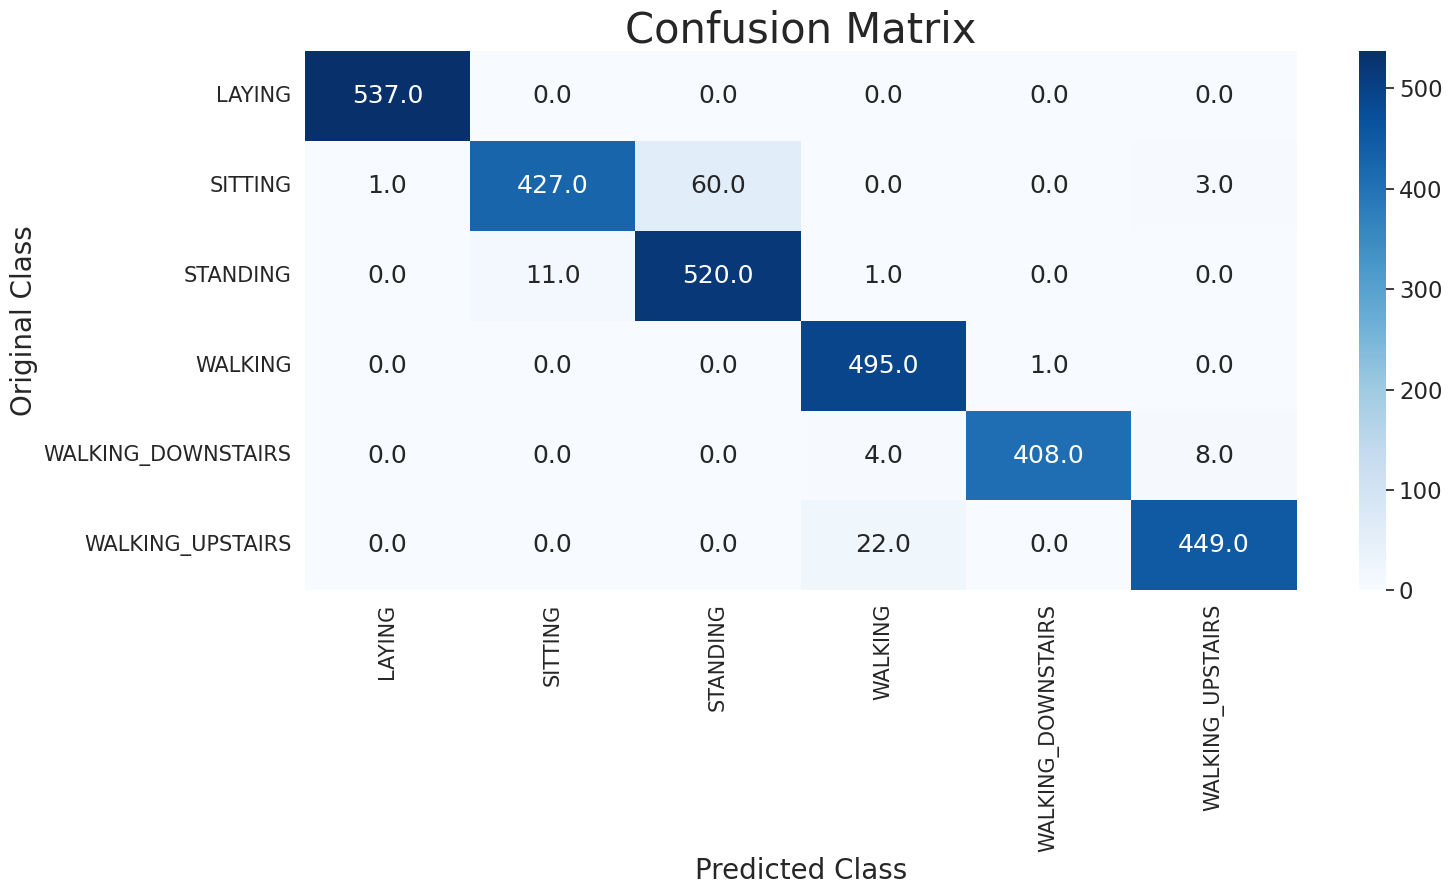

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Pca reduced dataset :
-------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


------------
| Accuracy |
------------
94.60468272819817
------------
| precision |
------------
94.60468272819817
------------
| Recall |
------------
94.60468272819817
------------
| F-1 |
------------
94.60468272819817
-------------------
| Best Estimator 1|
-------------------
LogisticRegression(C=1, solver='liblinear')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}





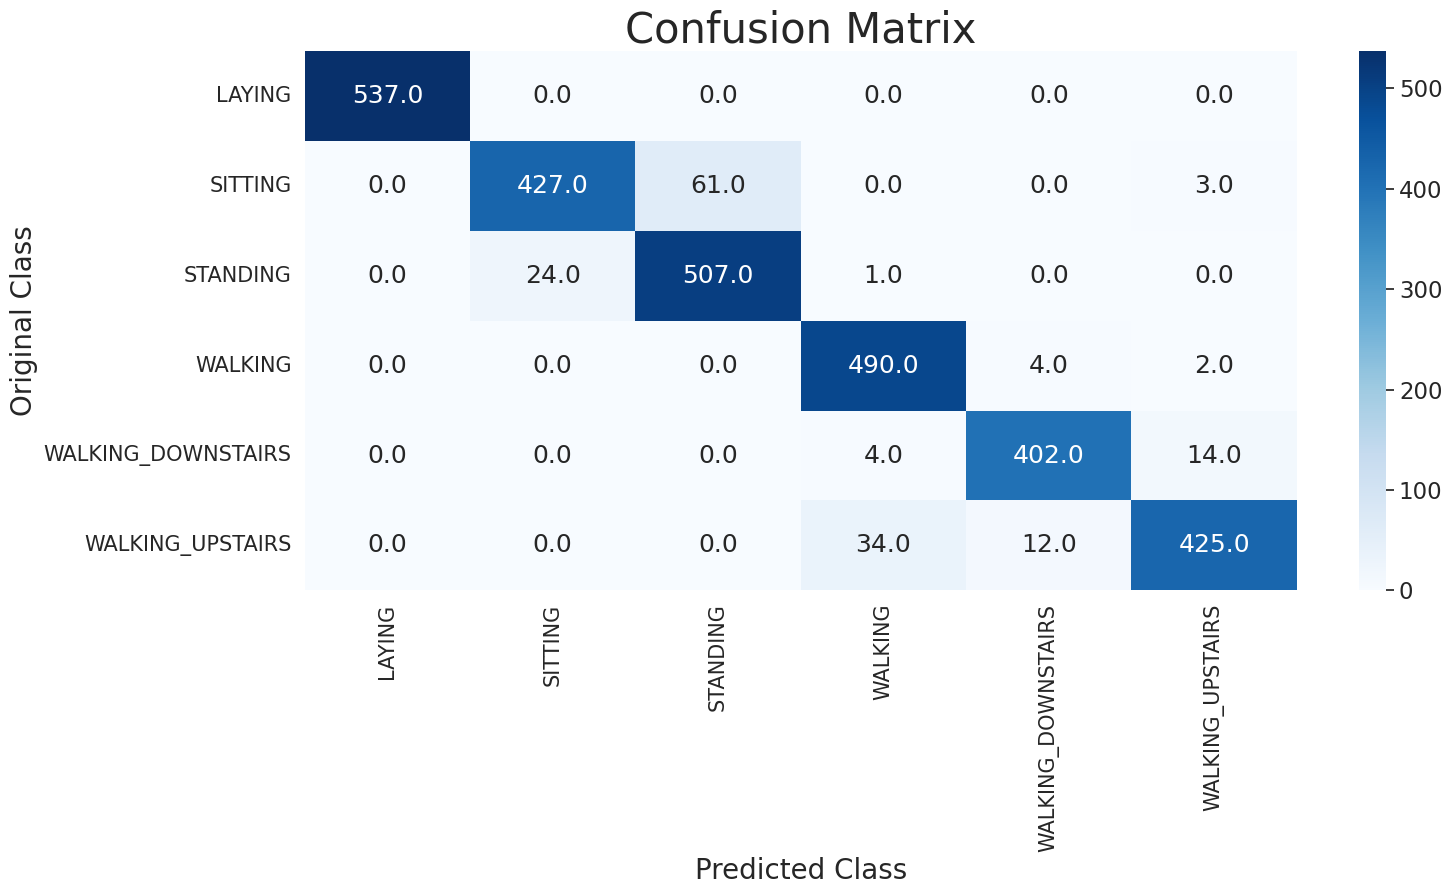

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Kernel Pca reduced data set :
-------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


------------
| Accuracy |
------------
85.78215134034612
------------
| precision |
------------
85.78215134034612
------------
| Recall |
------------
85.78215134034612
------------
| F-1 |
------------
85.78215134034612
-------------------
| Best Estimator 1|
-------------------
LogisticRegression(C=10, penalty='l1', solver='liblinear')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}





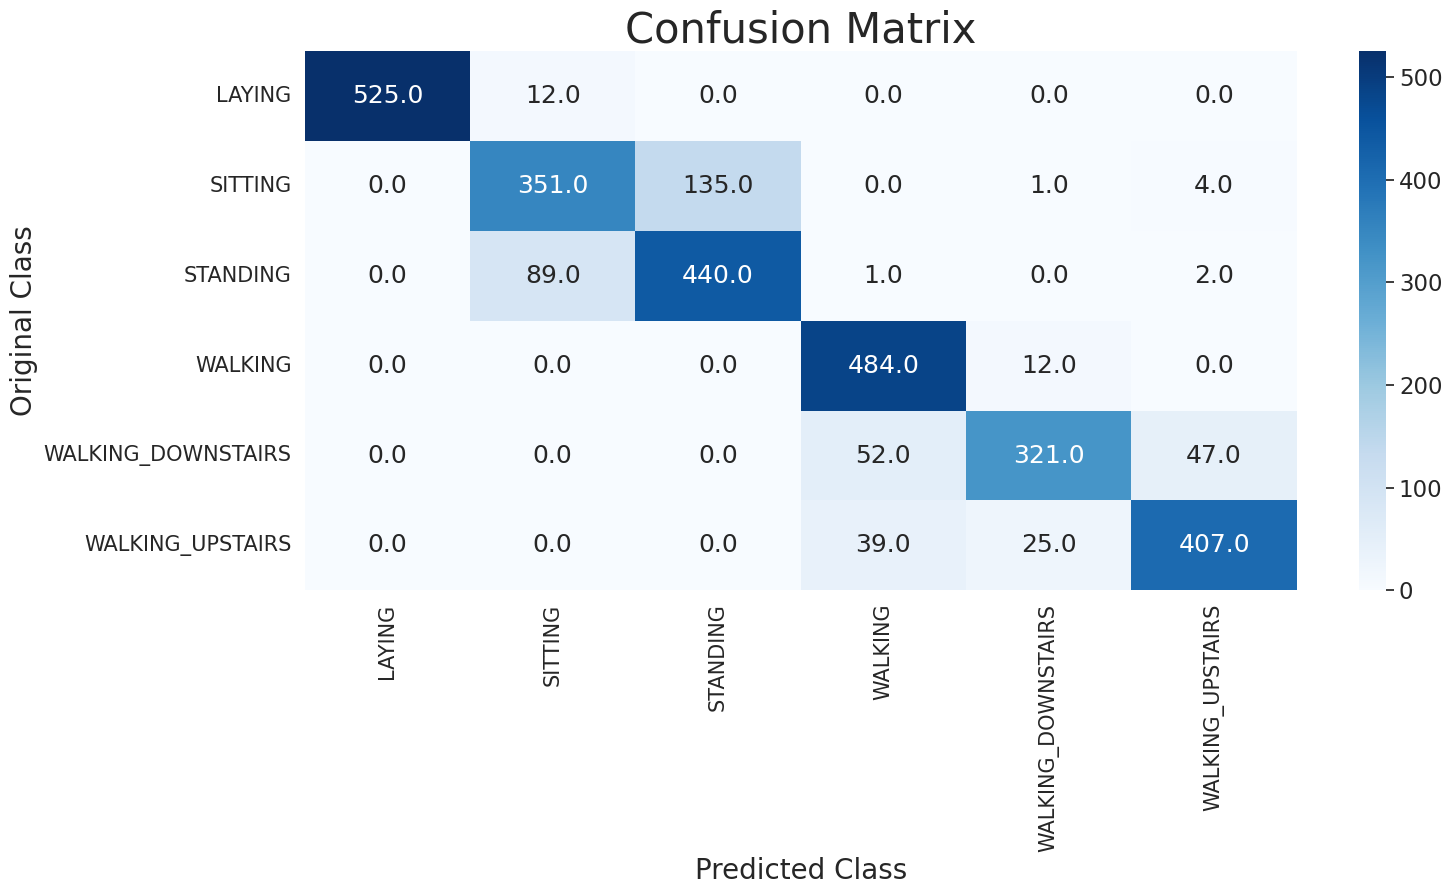

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  LDA reduced dataset :
-------------------------
------------
| Accuracy |
------------
96.23345775364778
------------
| precision |
------------
96.23345775364778
------------
| Recall |
------------
96.23345775364778
------------
| F-1 |
------------
96.23345775364778
-------------------
| Best Estimator 1|
-------------------
LogisticRegression(C=10, penalty='l1', solver='liblinear')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}





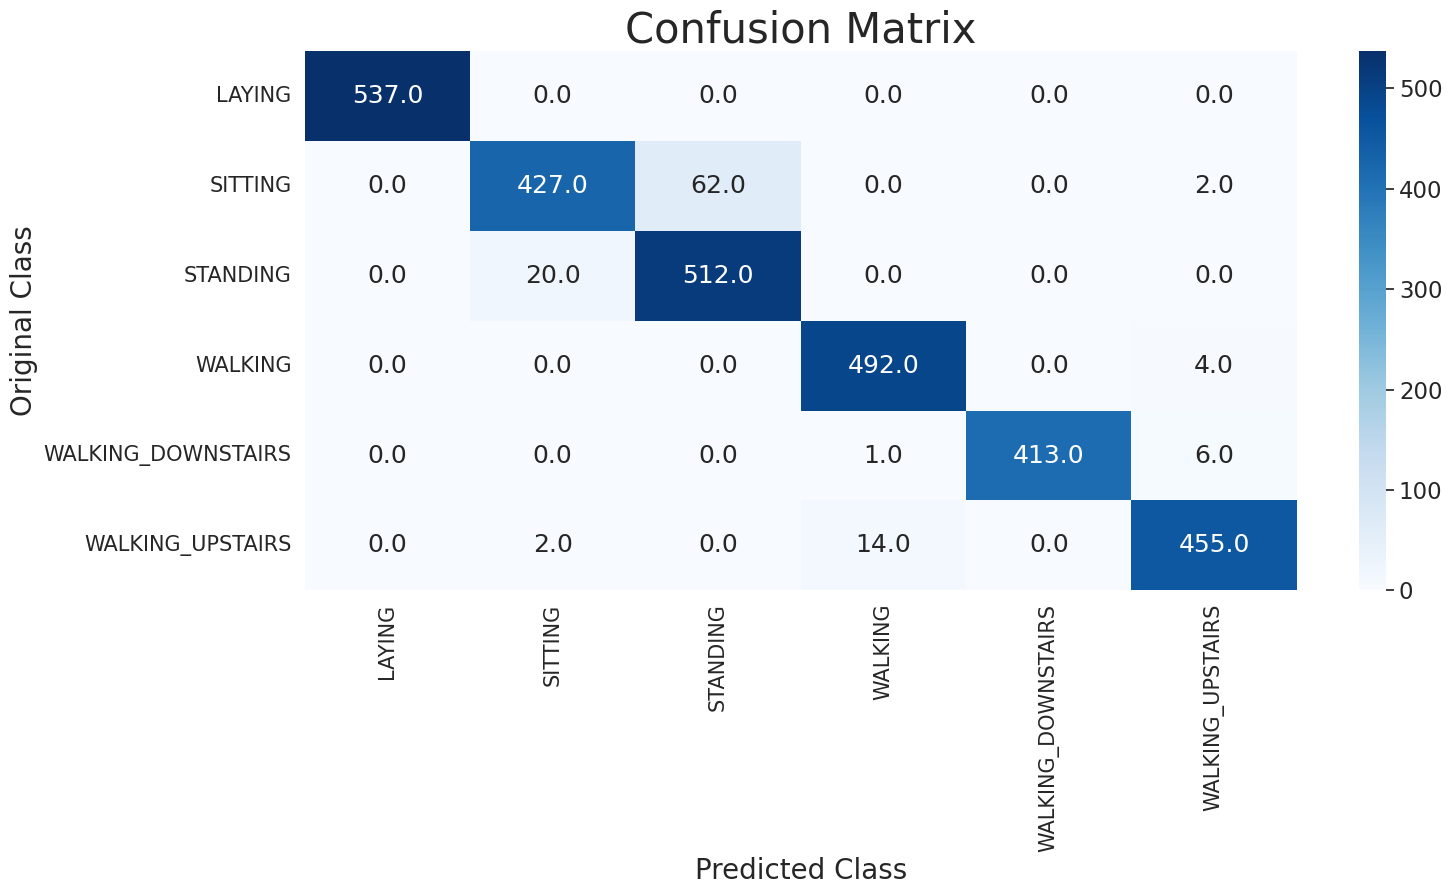

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
---------------------------------------------------------------------------------------------------------------
decision tree
---------------------------------------------------------------------------------------------------------------
results for  normal dataset :
-------------------------
------------
| Accuracy |
------------
83.98371224974551
------------
| precision |
------------
83.98371224974551
------------
| Recall |
------------
83.98371224974551
------------
| F-1 |
------------
83.9837122497455
-------------------
| Best Estimator 1|
-------------------
DecisionTreeClassifier(criterion='entropy')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'criterion': 'entropy', 'max_depth': None}





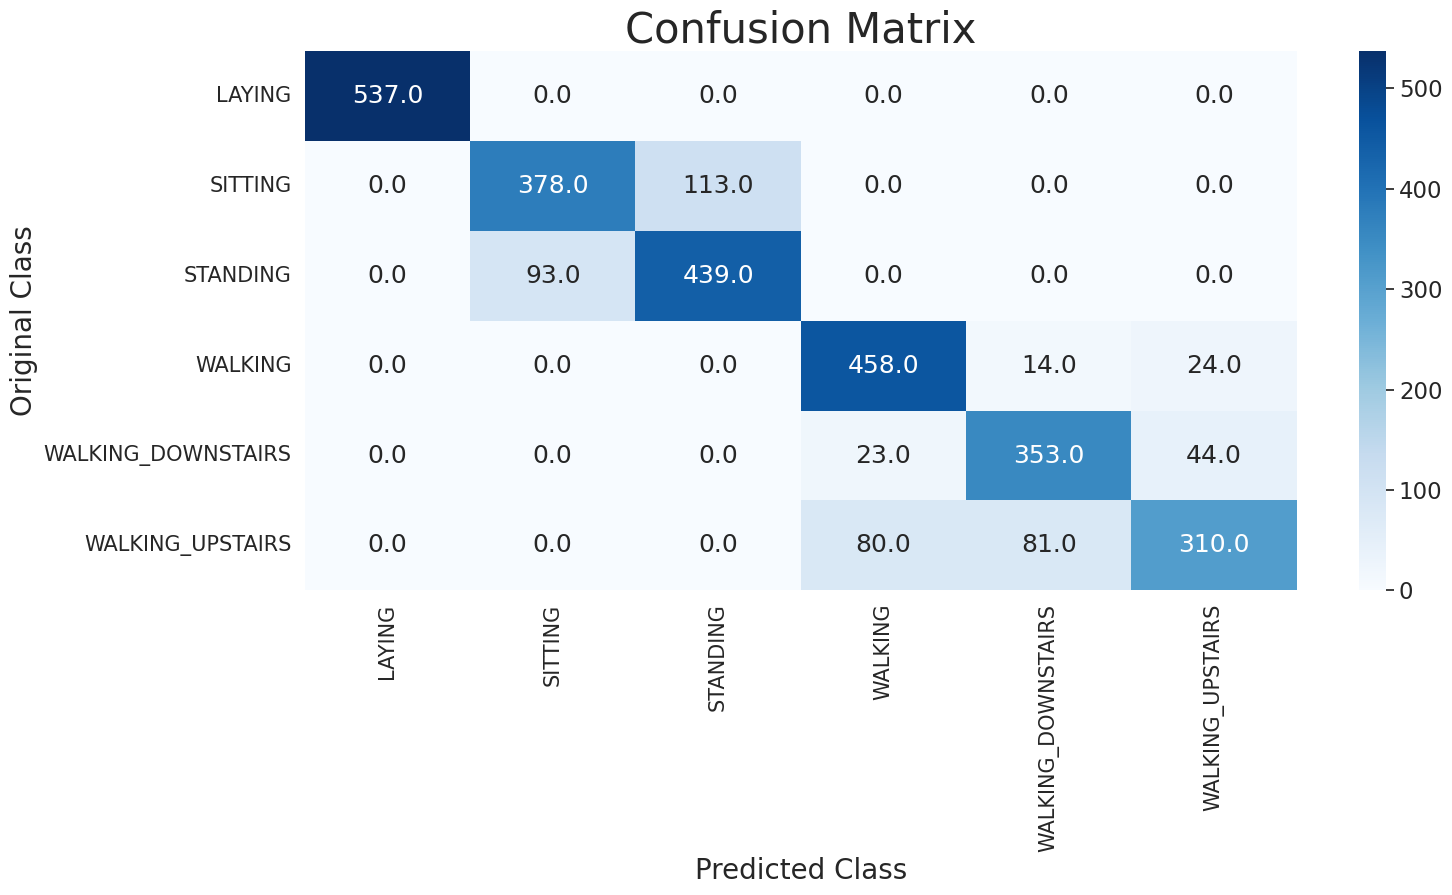

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Pca reduced dataset :
-------------------------
------------
| Accuracy |
------------
81.74414658975229
------------
| precision |
------------
81.74414658975229
------------
| Recall |
------------
81.74414658975229
------------
| F-1 |
------------
81.74414658975229
-------------------
| Best Estimator 1|
-------------------
DecisionTreeClassifier(max_depth=10)

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'criterion': 'gini', 'max_depth': 10}





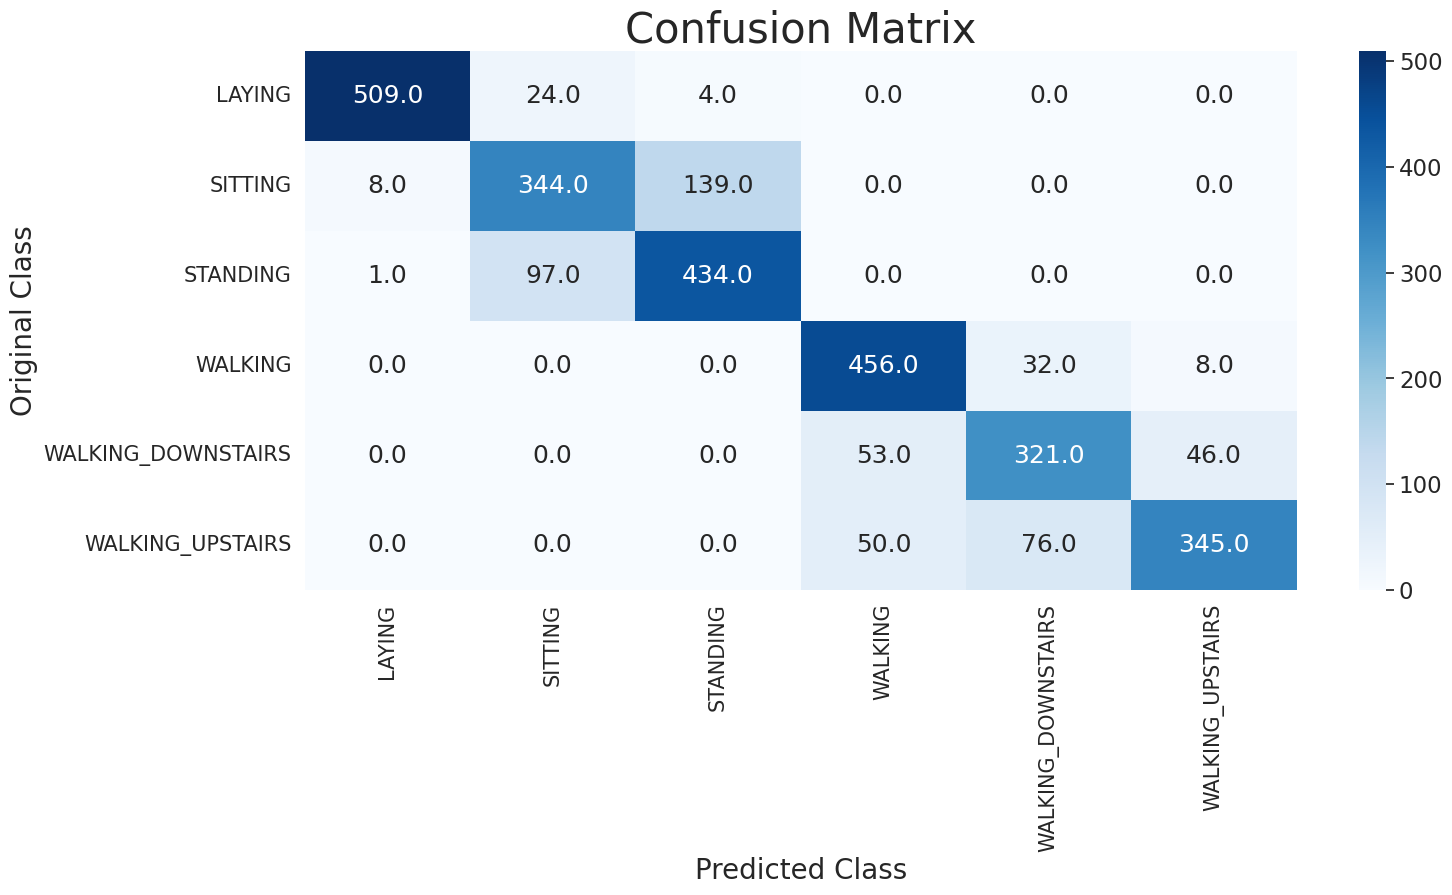

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Kernel Pca reduced data set :
-------------------------
------------
| Accuracy |
------------
80.59043094672549
------------
| precision |
------------
80.59043094672549
------------
| Recall |
------------
80.59043094672549
------------
| F-1 |
------------
80.59043094672549
-------------------
| Best Estimator 1|
-------------------
DecisionTreeClassifier(max_depth=10)

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'criterion': 'gini', 'max_depth': 10}





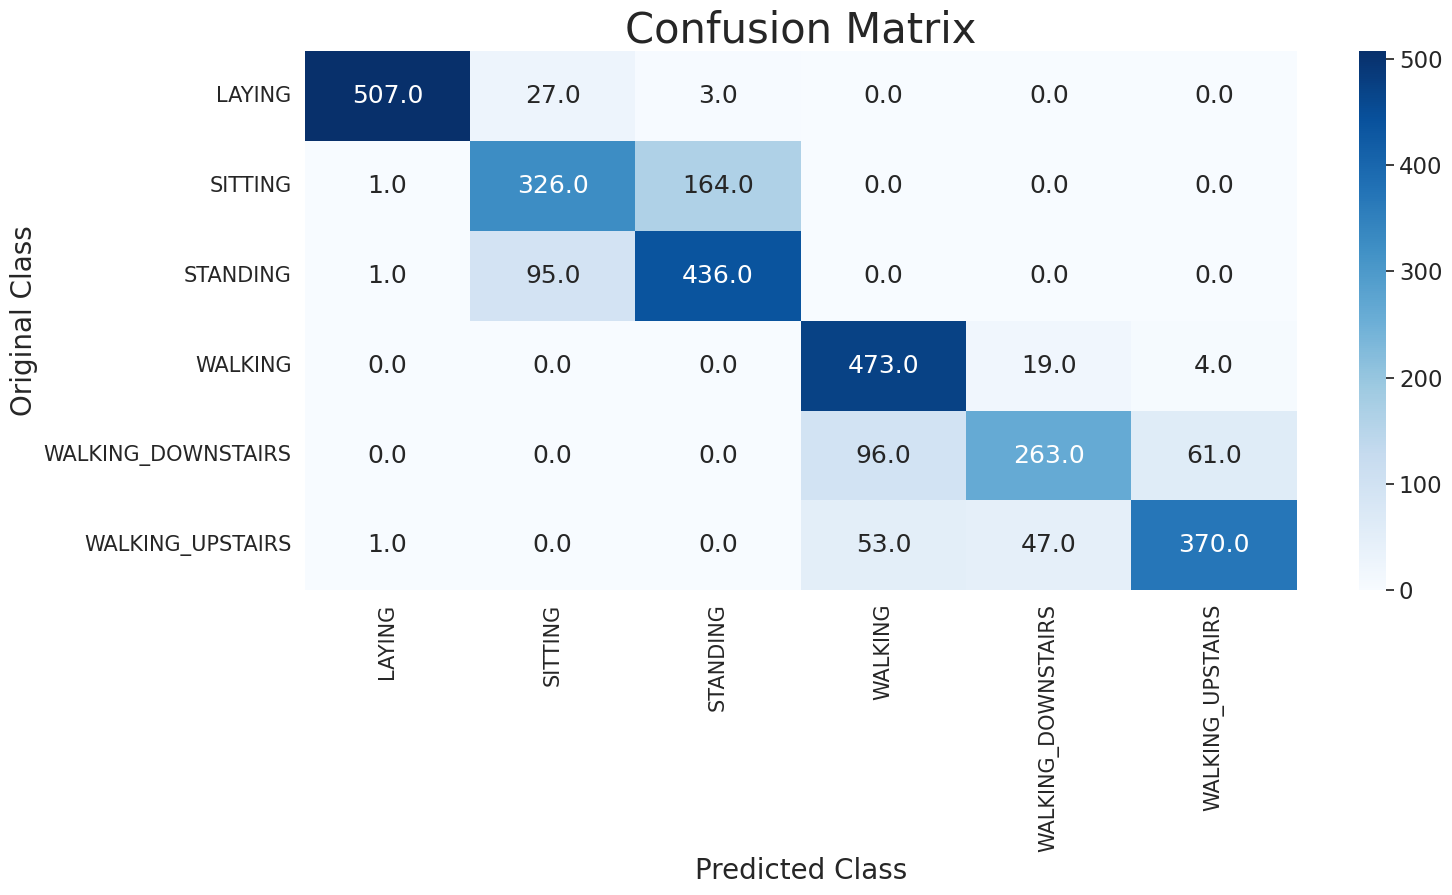

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  LDA reduced dataset :
-------------------------
------------
| Accuracy |
------------
95.14760773668137
------------
| precision |
------------
95.14760773668137
------------
| Recall |
------------
95.14760773668137
------------
| F-1 |
------------
95.14760773668137
-------------------
| Best Estimator 1|
-------------------
DecisionTreeClassifier(max_depth=5)

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'criterion': 'gini', 'max_depth': 5}





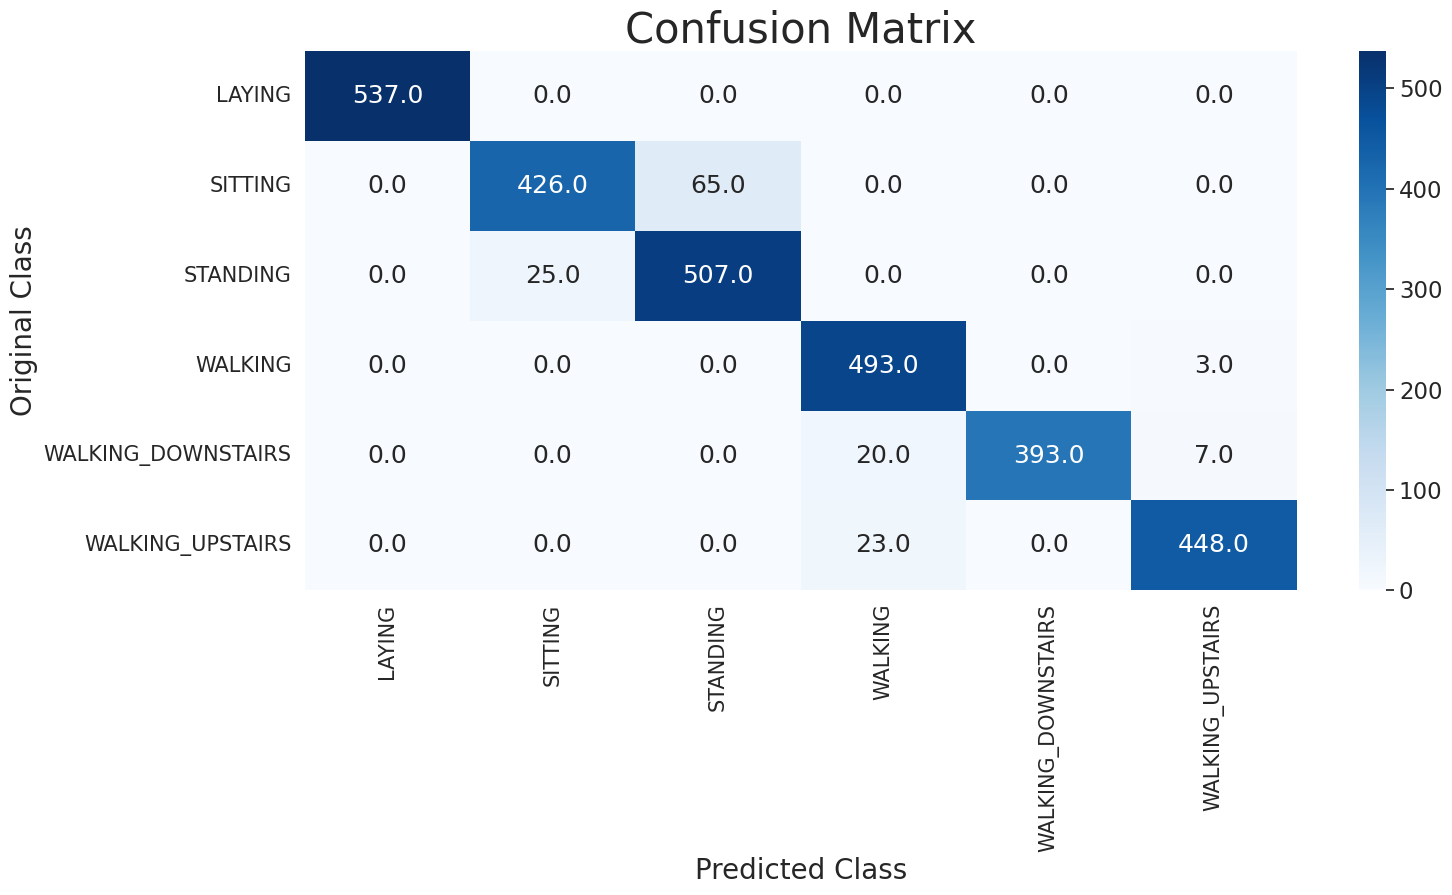

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
---------------------------------------------------------------------------------------------------------------
random forest
---------------------------------------------------------------------------------------------------------------
results for  normal dataset :
-------------------------
------------
| Accuracy |
------------
92.97590770274856
------------
| precision |
------------
92.97590770274856
------------
| Recall |
------------
92.97590770274856
------------
| F-1 |
------------
92.97590770274856
-------------------
| Best Estimator 1|
-------------------
RandomForestClassifier(criterion='entropy')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}





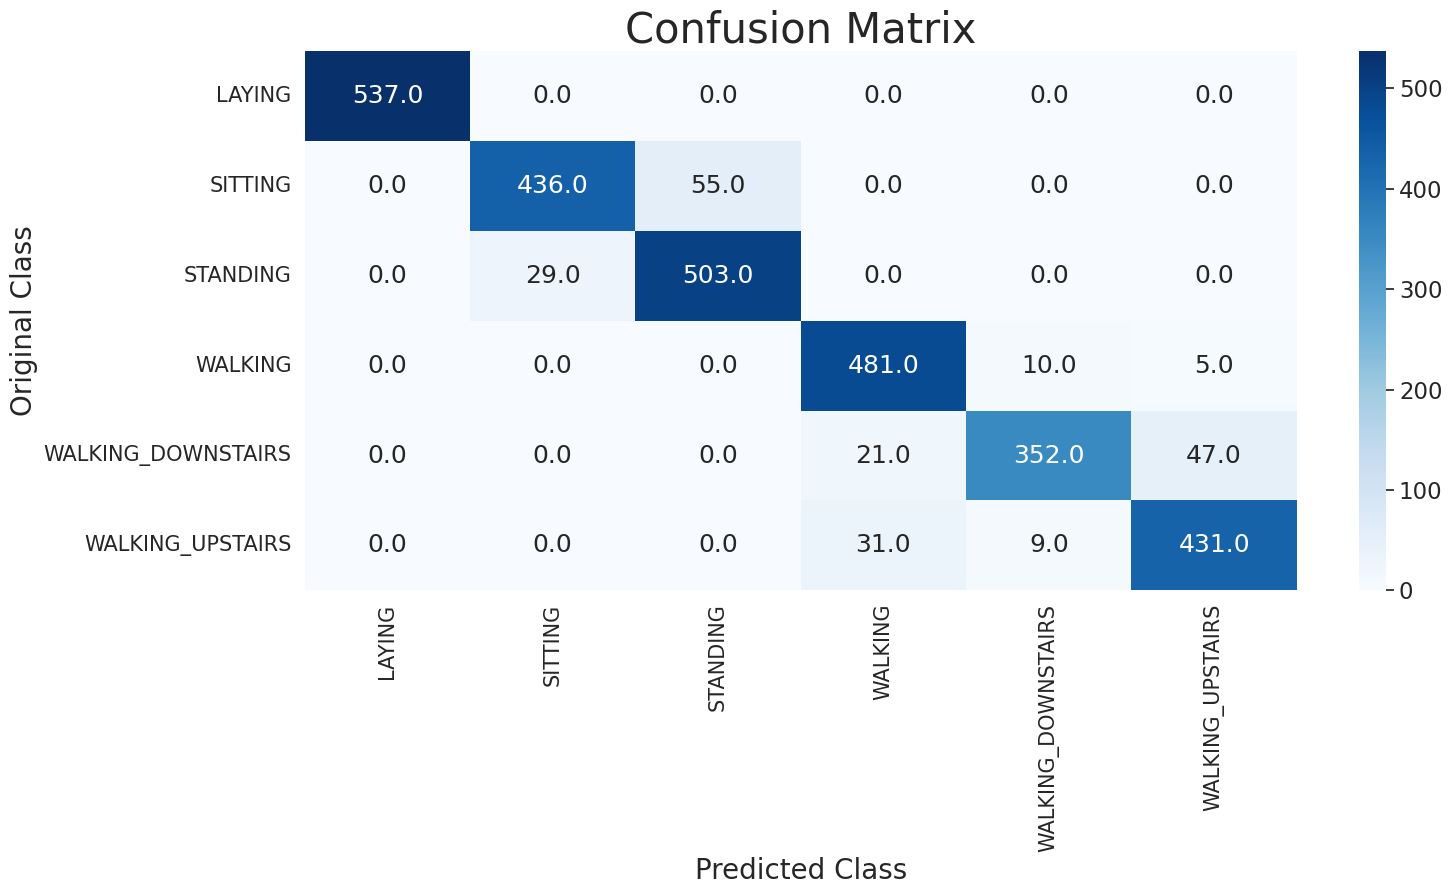

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Pca reduced dataset :
-------------------------
------------
| Accuracy |
------------
91.55072955548015
------------
| precision |
------------
91.55072955548015
------------
| Recall |
------------
91.55072955548015
------------
| F-1 |
------------
91.55072955548015
-------------------
| Best Estimator 1|
-------------------
RandomForestClassifier(criterion='entropy', n_estimators=200)

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}





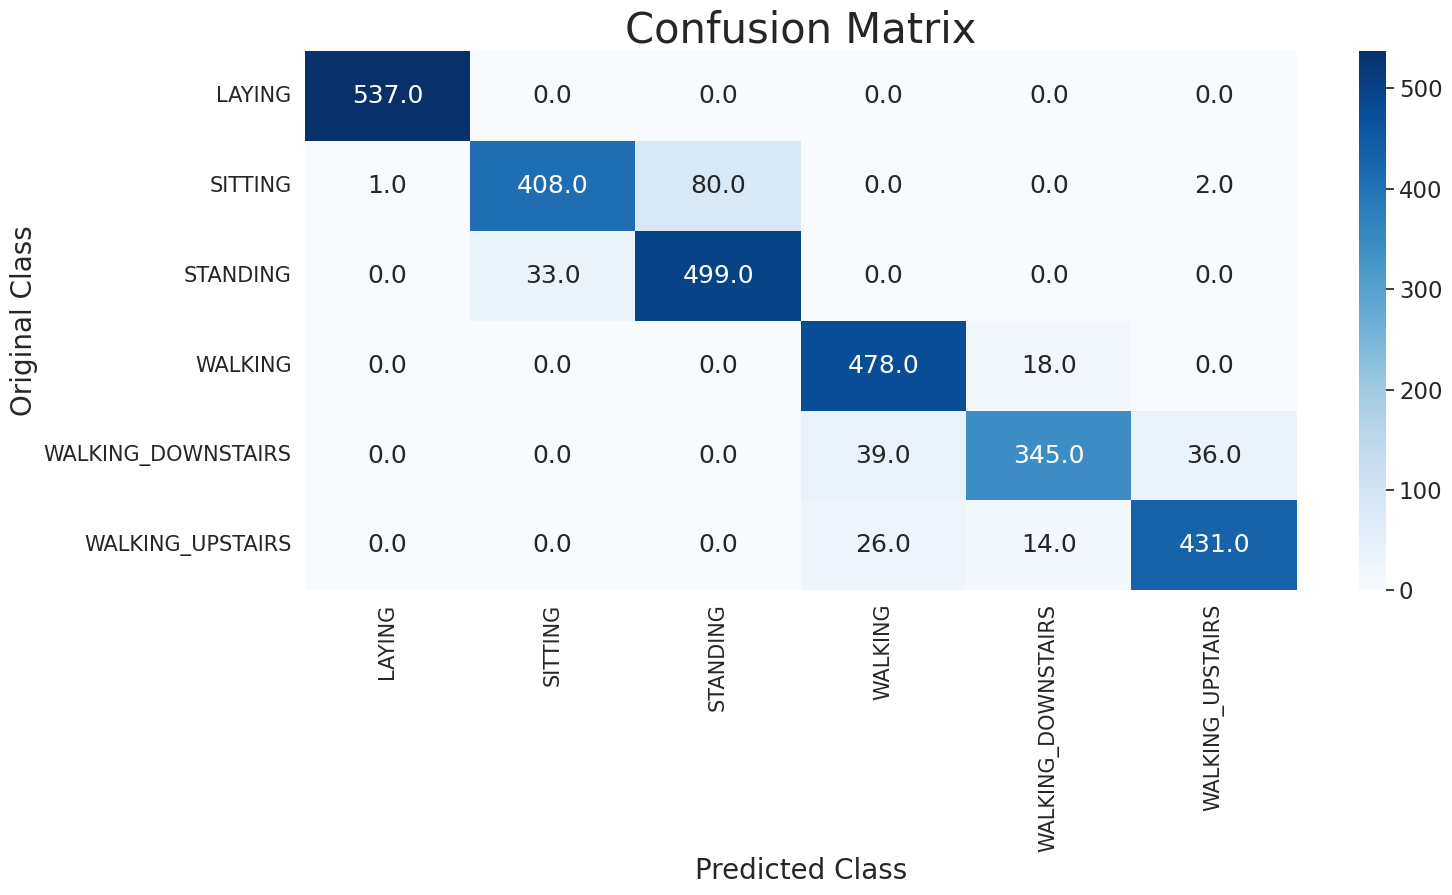

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Kernel Pca reduced data set :
-------------------------
------------
| Accuracy |
------------
86.15541228367832
------------
| precision |
------------
86.15541228367832
------------
| Recall |
------------
86.15541228367832
------------
| F-1 |
------------
86.15541228367832
-------------------
| Best Estimator 1|
-------------------
RandomForestClassifier(max_depth=10)

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}





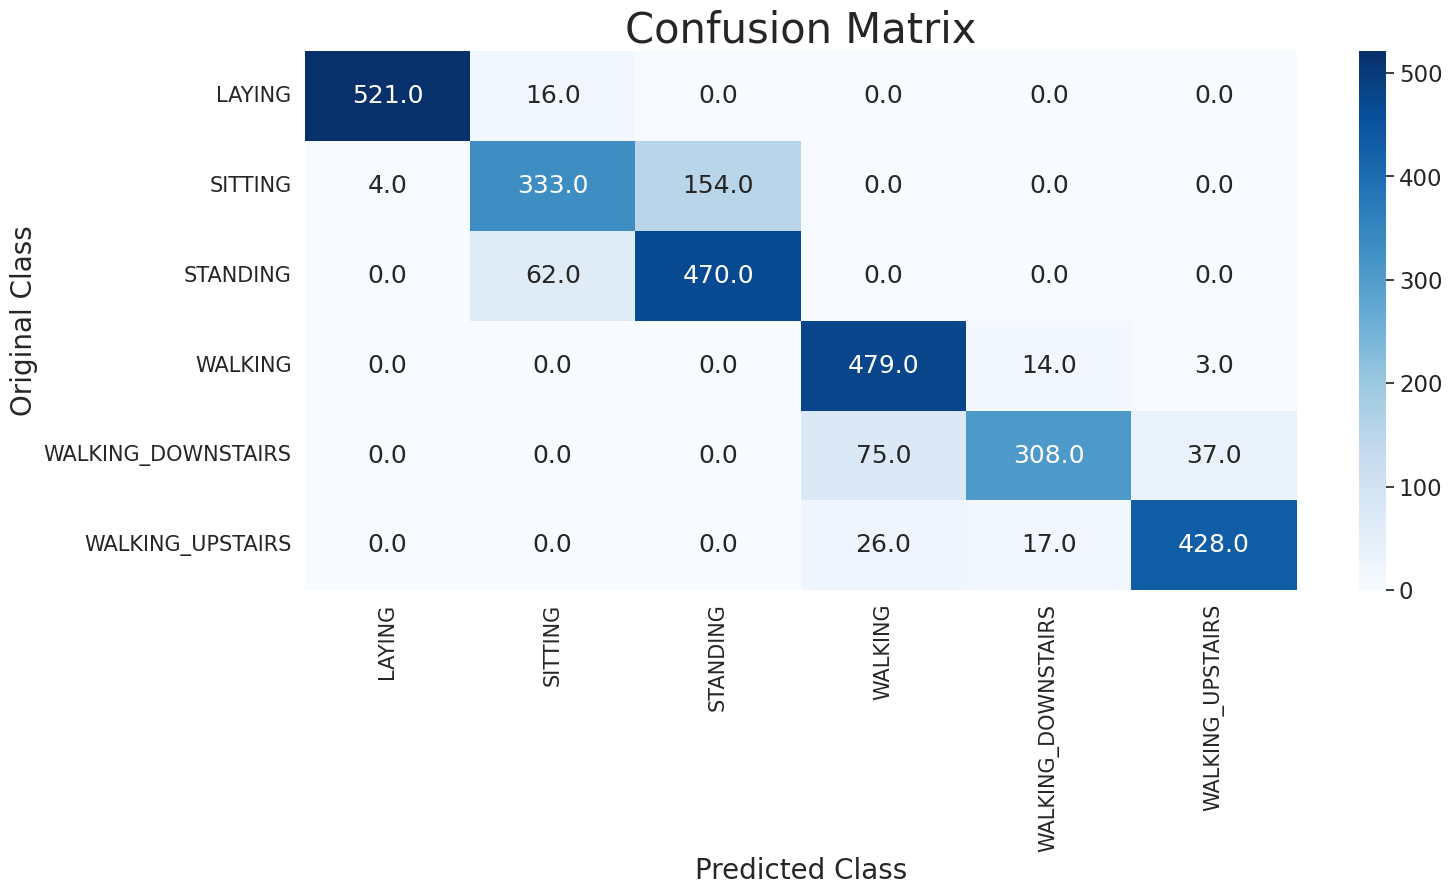

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  LDA reduced dataset :
-------------------------
------------
| Accuracy |
------------
96.13165931455717
------------
| precision |
------------
96.13165931455717
------------
| Recall |
------------
96.13165931455717
------------
| F-1 |
------------
96.13165931455717
-------------------
| Best Estimator 1|
-------------------
RandomForestClassifier(max_depth=5)

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}





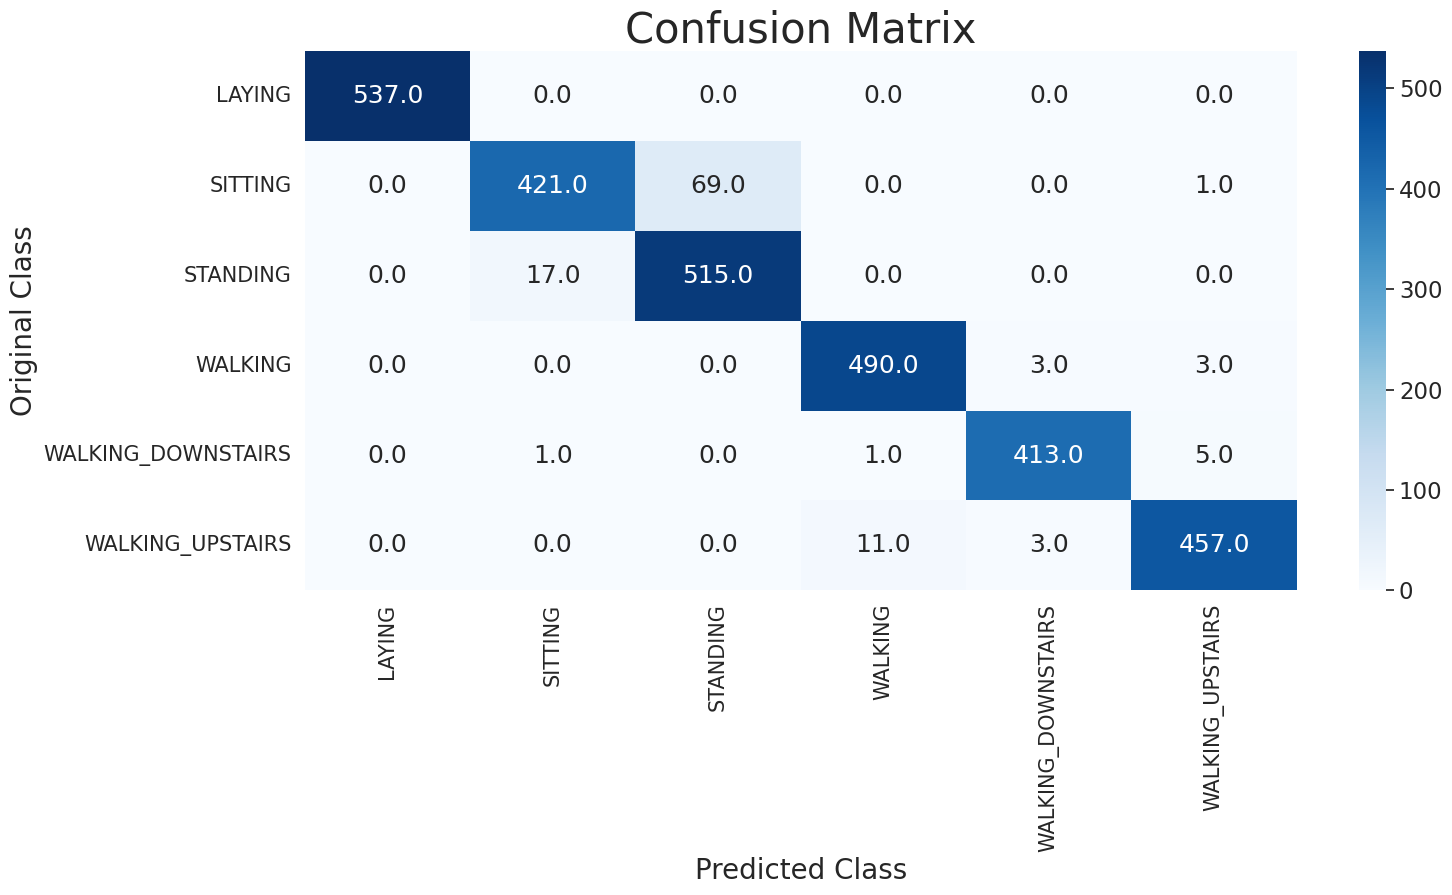

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
---------------------------------------------------------------------------------------------------------------
KNN
---------------------------------------------------------------------------------------------------------------
results for  normal dataset :
-------------------------
------------
| Accuracy |
------------
90.43094672548354
------------
| precision |
------------
90.43094672548354
------------
| Recall |
------------
90.43094672548354
------------
| F-1 |
------------
90.43094672548354
-------------------
| Best Estimator 1|
-------------------
KNeighborsClassifier(n_neighbors=7, weights='distance')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}





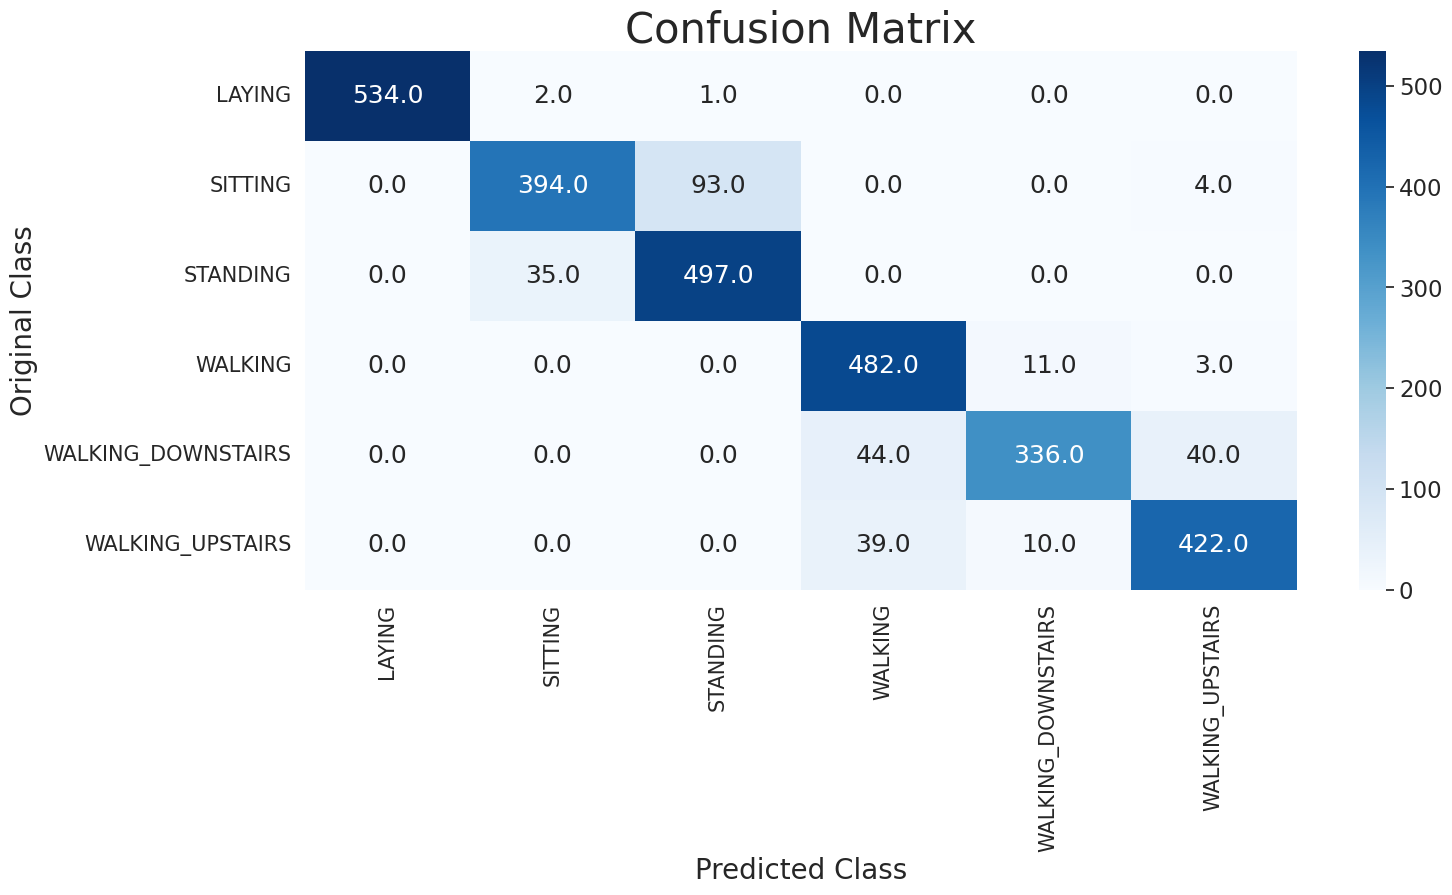

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Pca reduced dataset :
-------------------------
------------
| Accuracy |
------------
89.98982015609094
------------
| precision |
------------
89.98982015609094
------------
| Recall |
------------
89.98982015609094
------------
| F-1 |
------------
89.98982015609094
-------------------
| Best Estimator 1|
-------------------
KNeighborsClassifier(n_neighbors=7)

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}





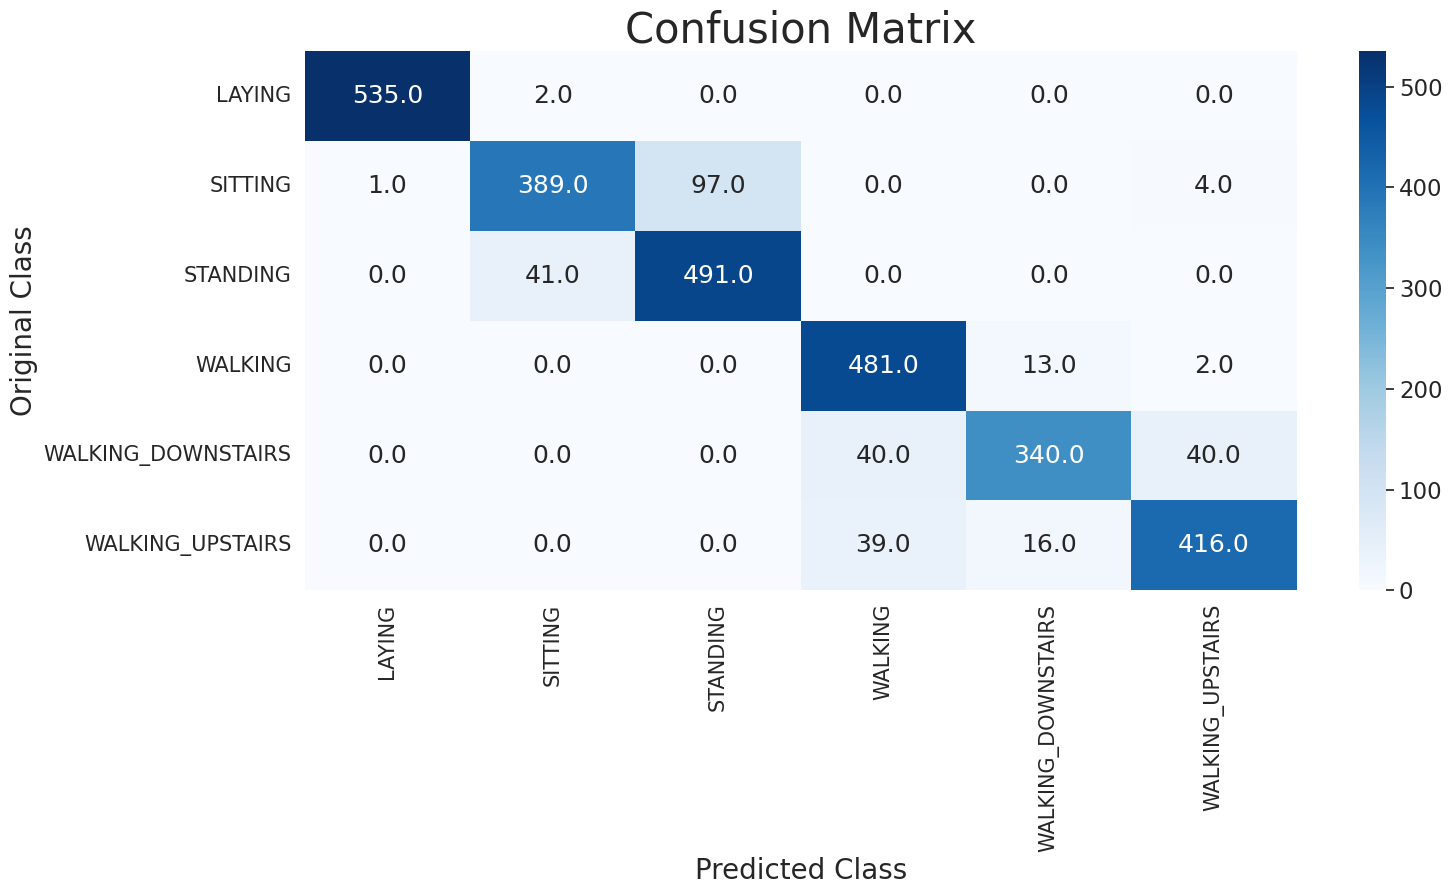

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Kernel Pca reduced data set :
-------------------------
------------
| Accuracy |
------------
84.11944350186631
------------
| precision |
------------
84.11944350186631
------------
| Recall |
------------
84.11944350186631
------------
| F-1 |
------------
84.11944350186631
-------------------
| Best Estimator 1|
-------------------
KNeighborsClassifier(n_neighbors=7, weights='distance')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}





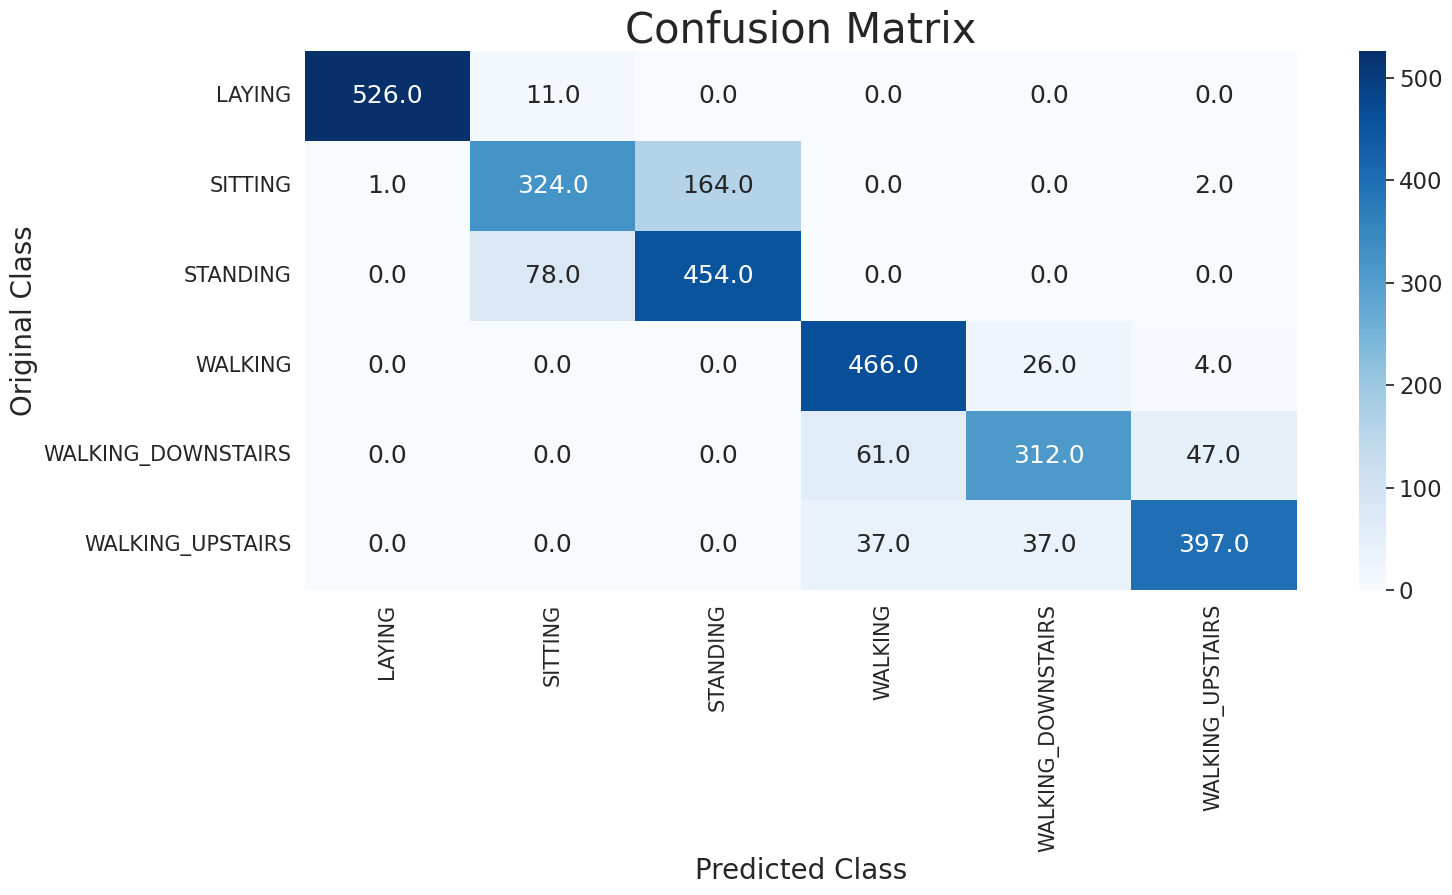

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  LDA reduced dataset :
-------------------------
------------
| Accuracy |
------------
96.53885307091959
------------
| precision |
------------
96.53885307091959
------------
| Recall |
------------
96.53885307091959
------------
| F-1 |
------------
96.53885307091959
-------------------
| Best Estimator 1|
-------------------
KNeighborsClassifier(n_neighbors=7)

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}





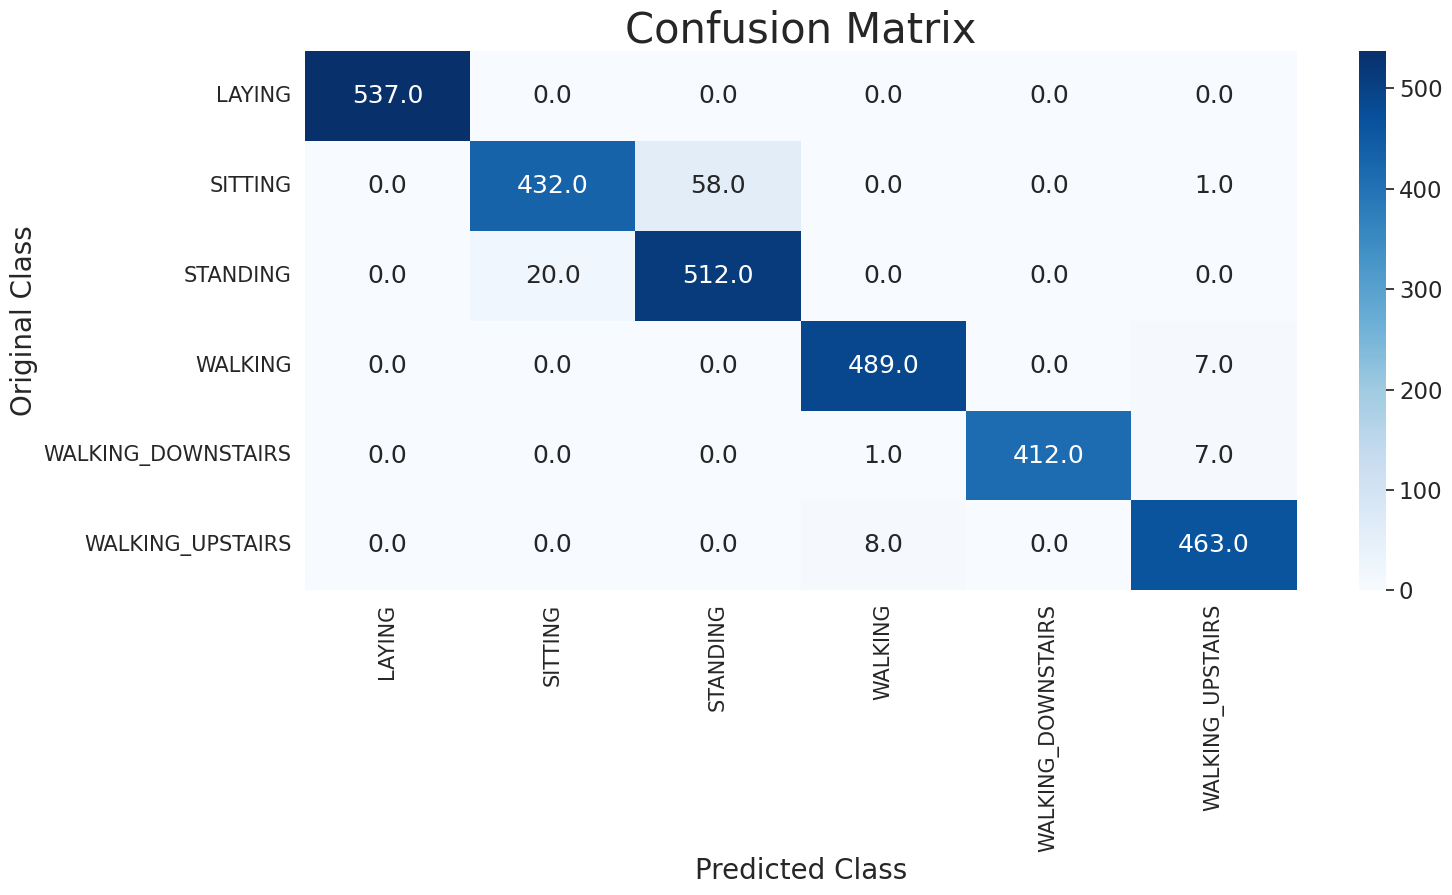

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
---------------------------------------------------------------------------------------------------------------
XGboost
---------------------------------------------------------------------------------------------------------------
results for  normal dataset :
-------------------------
------------
| Accuracy |
------------
93.89209365456396
------------
| precision |
------------
93.89209365456396
------------
| Recall |
------------
93.89209365456396
------------
| F-1 |
------------
93.89209365456396
-------------------
| Best Estimator 1|
-------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
            

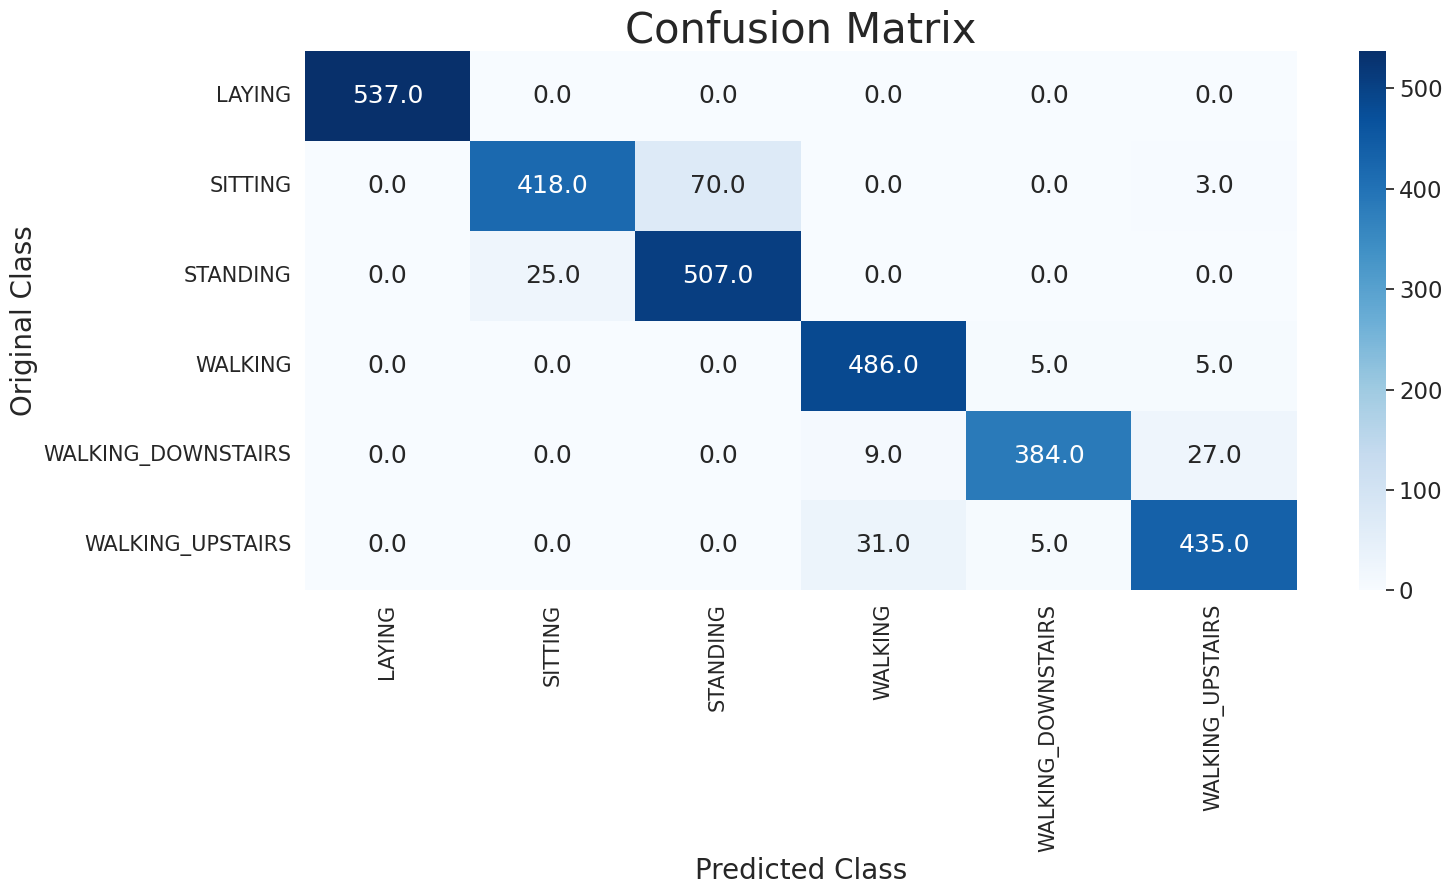

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Pca reduced dataset :
-------------------------
------------
| Accuracy |
------------
92.22938581608415
------------
| precision |
------------
92.22938581608415
------------
| Recall |
------------
92.22938581608415
------------
| F-1 |
------------
92.22938581608415
-------------------
| Best Estimator 1|
-------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_de

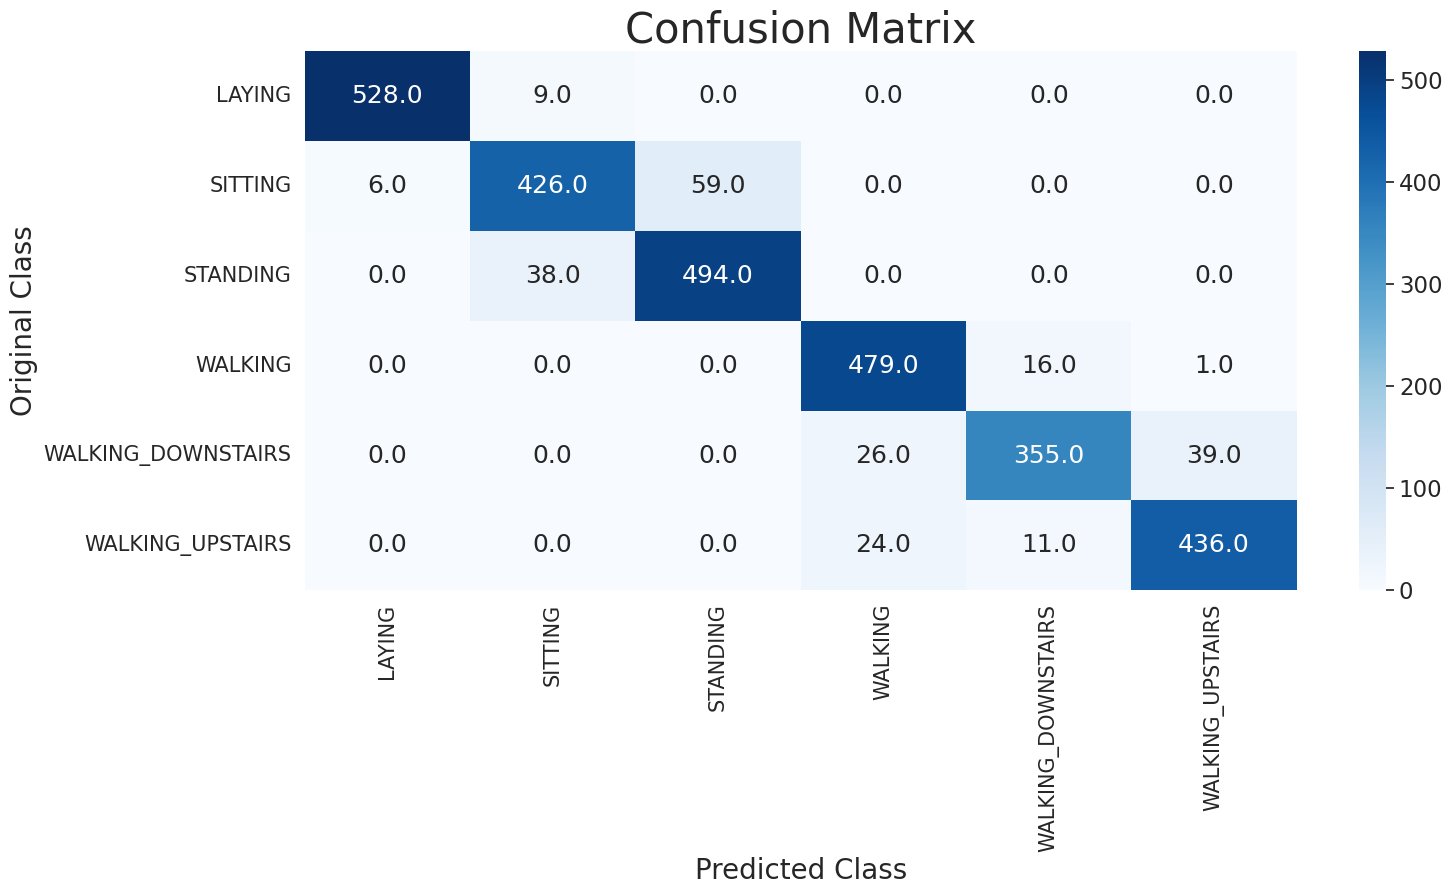

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Kernel Pca reduced data set :
-------------------------
------------
| Accuracy |
------------
86.08754665761792
------------
| precision |
------------
86.08754665761792
------------
| Recall |
------------
86.08754665761792
------------
| F-1 |
------------
86.08754665761792
-------------------
| Best Estimator 1|
-------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
            

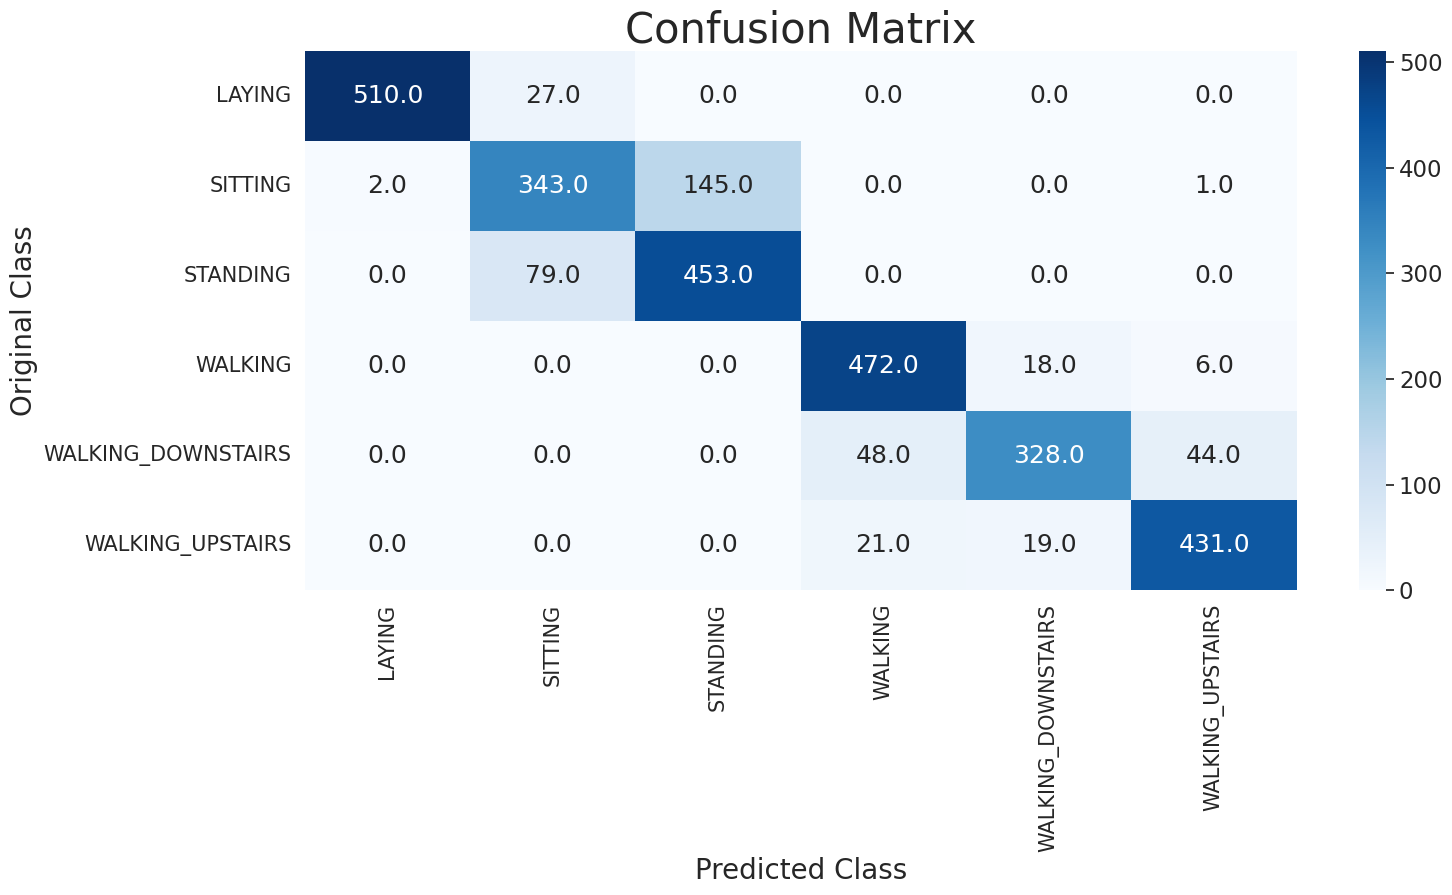

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  LDA reduced dataset :
-------------------------
------------
| Accuracy |
------------
96.09772650152698
------------
| precision |
------------
96.09772650152698
------------
| Recall |
------------
96.09772650152698
------------
| F-1 |
------------
96.09772650152698
-------------------
| Best Estimator 1|
-------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_de

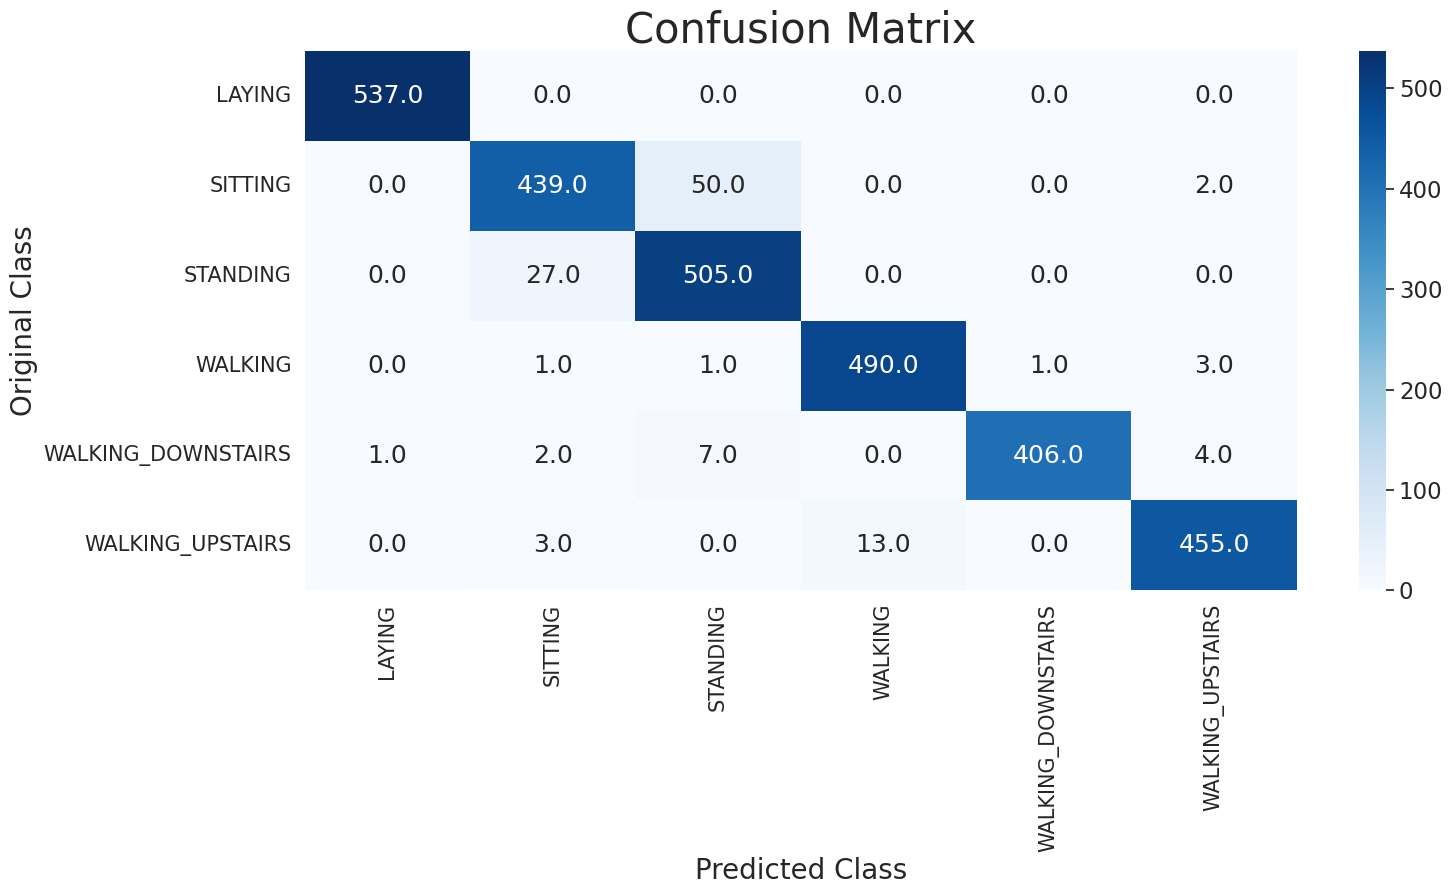

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
---------------------------------------------------------------------------------------------------------------
SVM
---------------------------------------------------------------------------------------------------------------
results for  normal dataset :
-------------------------
------------
| Accuracy |
------------
96.30132337970818
------------
| precision |
------------
96.30132337970818
------------
| Recall |
------------
96.30132337970818
------------
| F-1 |
------------
96.30132337970818
-------------------
| Best Estimator 1|
-------------------
SVC(C=10, kernel='poly')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}





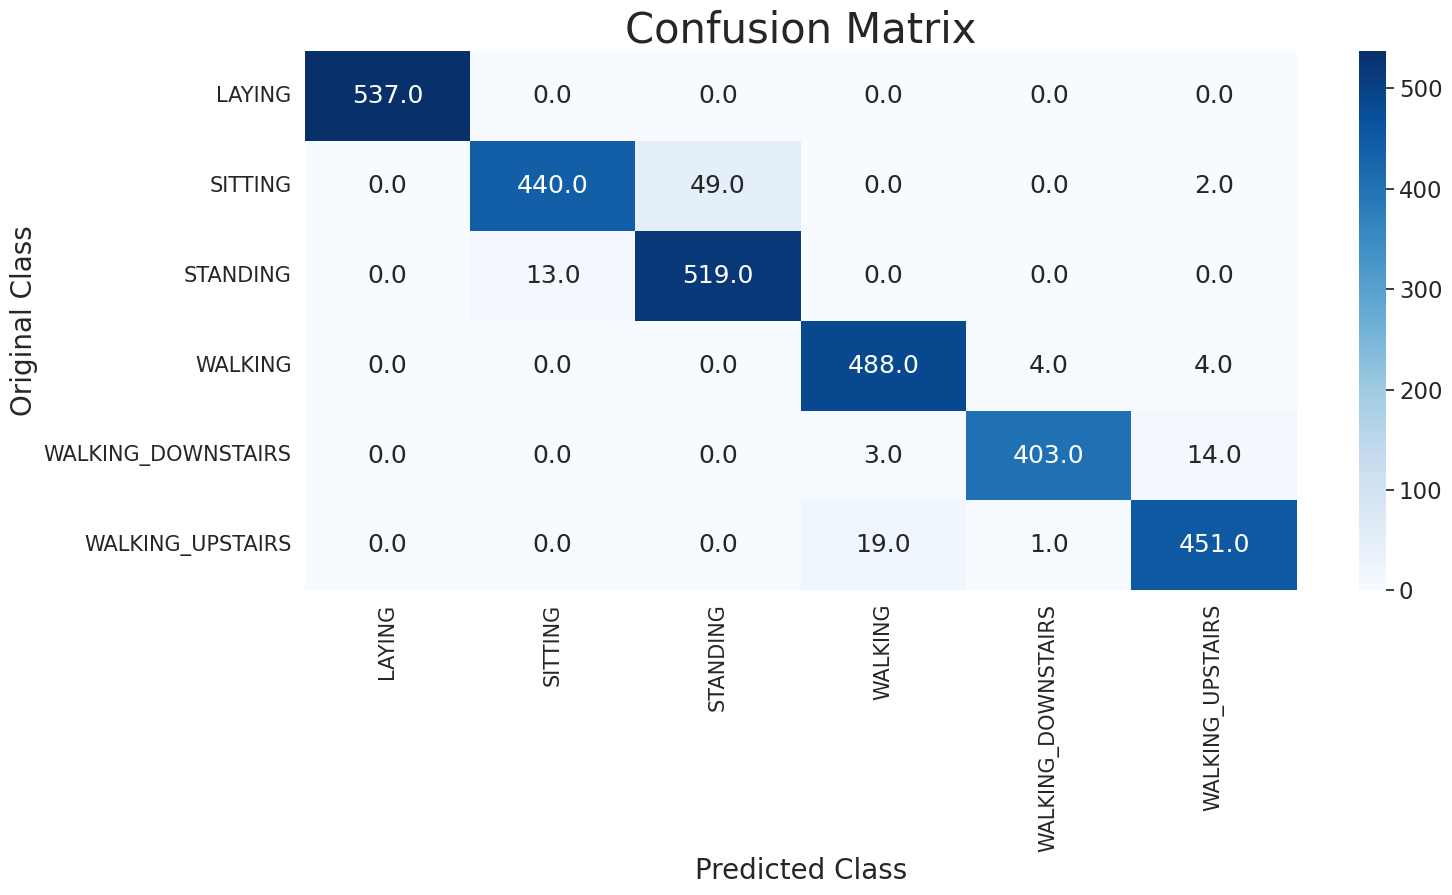

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Pca reduced dataset :
-------------------------
------------
| Accuracy |
------------
94.12962334577536
------------
| precision |
------------
94.12962334577536
------------
| Recall |
------------
94.12962334577536
------------
| F-1 |
------------
94.12962334577536
-------------------
| Best Estimator 1|
-------------------
SVC(C=10, gamma='auto')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}





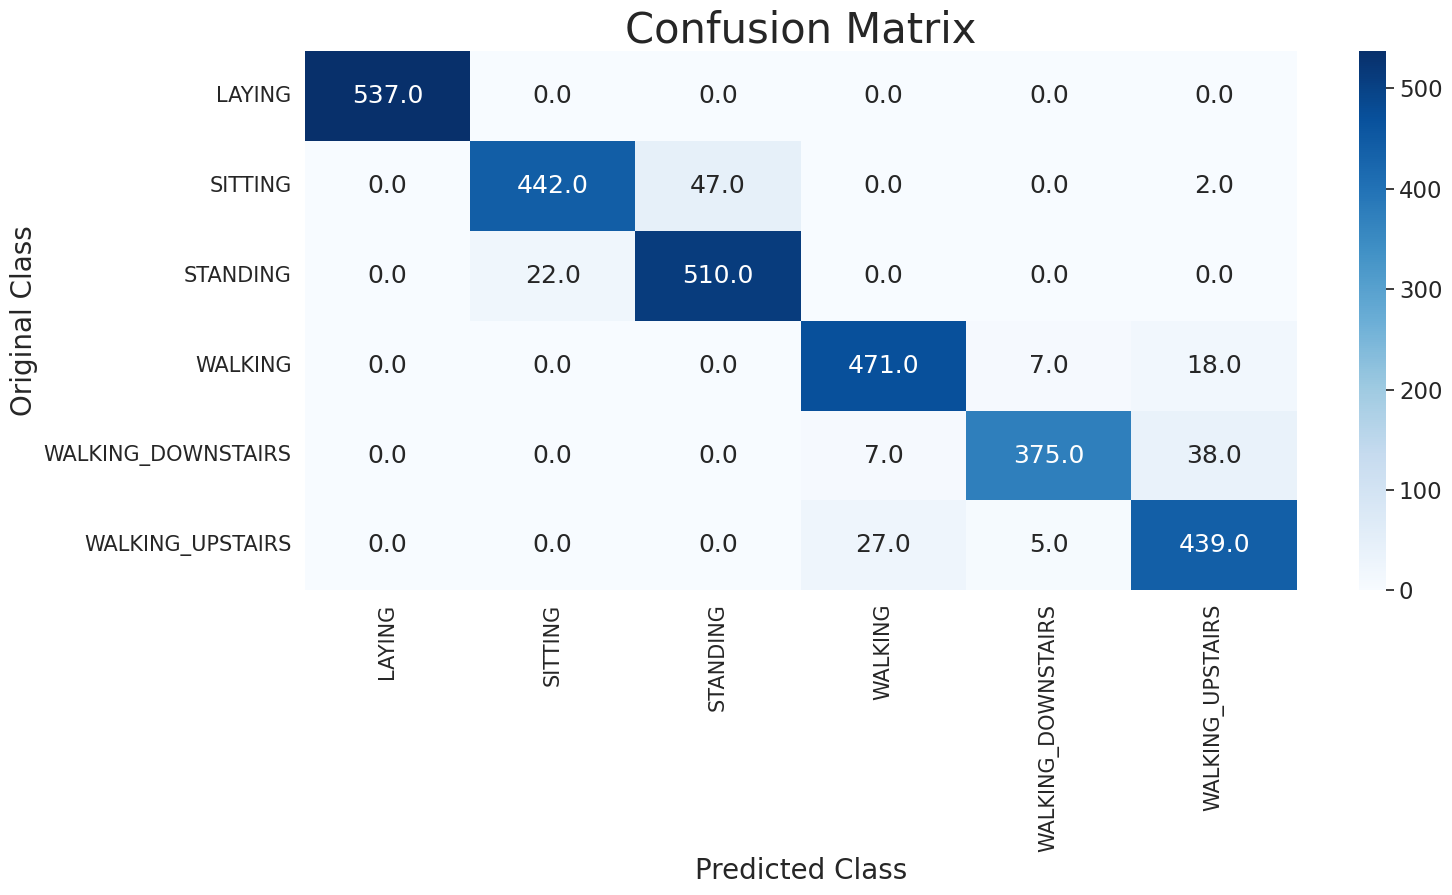

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  Kernel Pca reduced data set :
-------------------------
------------
| Accuracy |
------------
87.13946386155412
------------
| precision |
------------
87.13946386155412
------------
| Recall |
------------
87.13946386155412
------------
| F-1 |
------------
87.13946386155412
-------------------
| Best Estimator 1|
-------------------
SVC(C=10, kernel='poly')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}





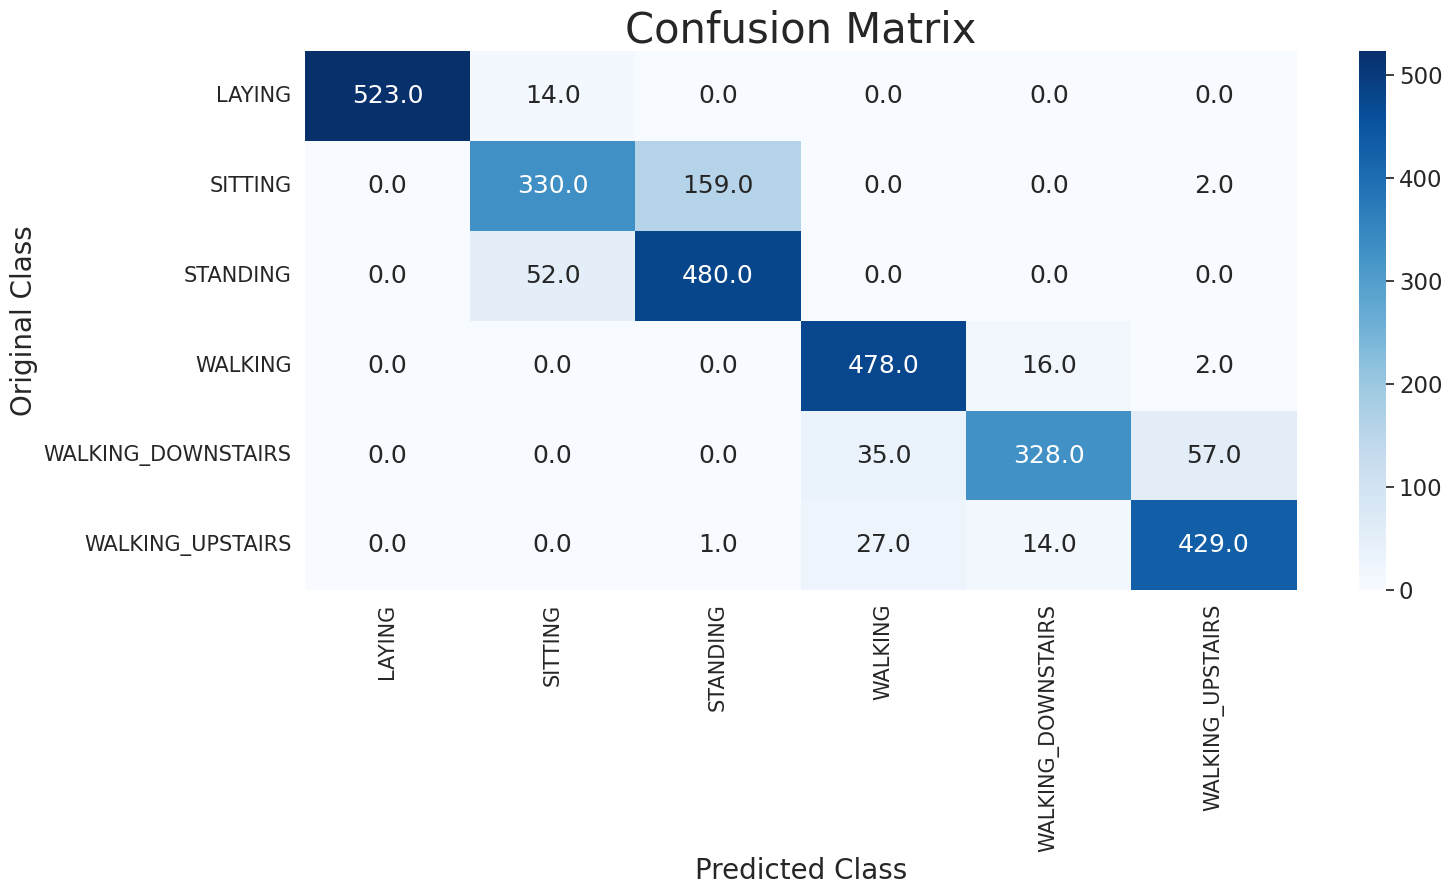

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
results for  LDA reduced dataset :
-------------------------
------------
| Accuracy |
------------
96.23345775364778
------------
| precision |
------------
96.23345775364778
------------
| Recall |
------------
96.23345775364778
------------
| F-1 |
------------
96.23345775364778
-------------------
| Best Estimator 1|
-------------------
SVC(C=1, kernel='poly')

---------------------------
| Best Hyper-Parameters 12|
---------------------------
{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}





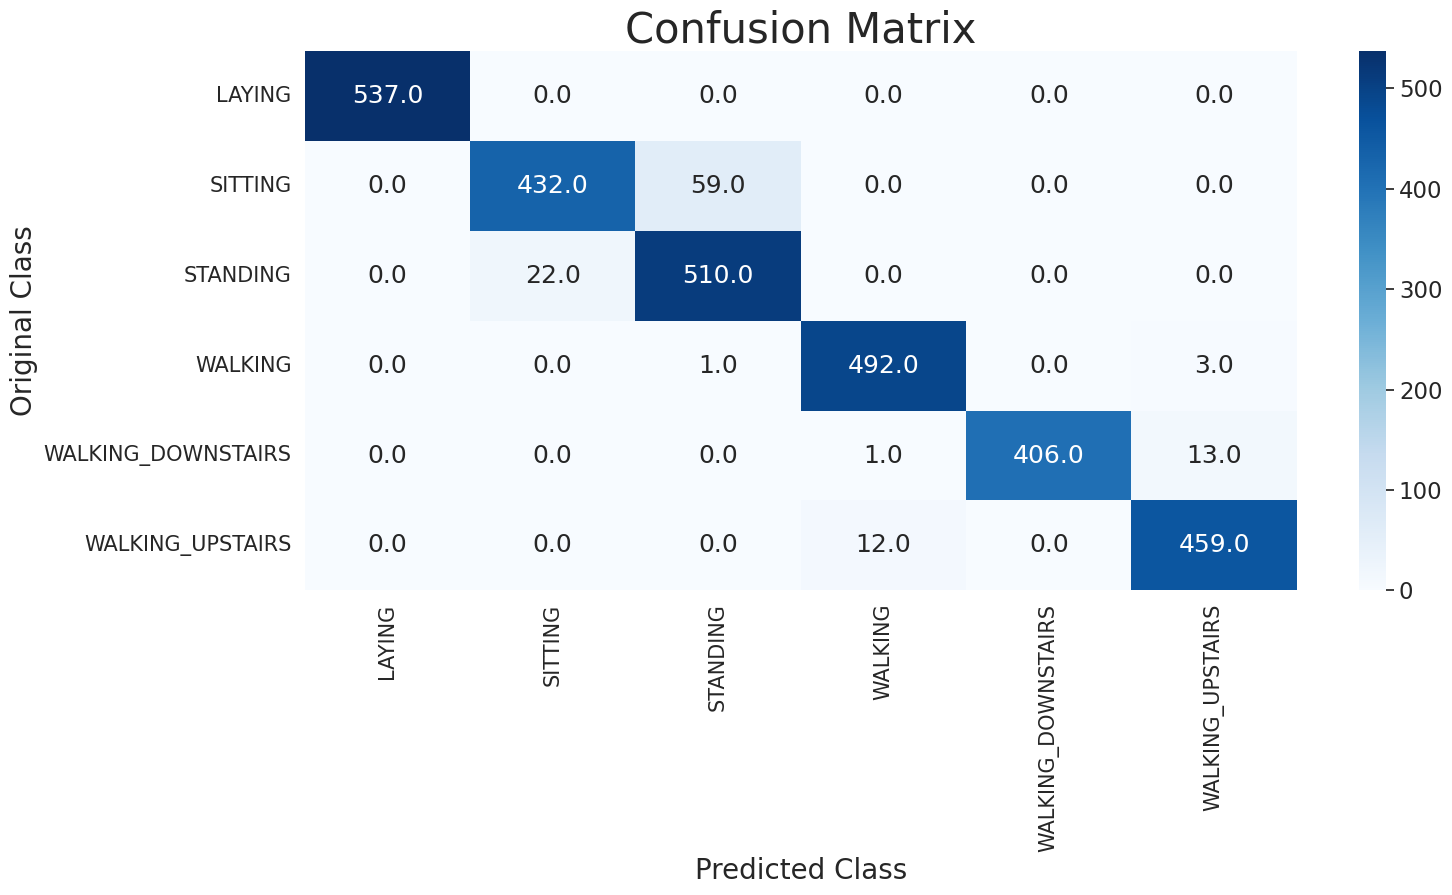

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
---------------------------------------------------------------------------------------------------------------


In [21]:
# Logistic Regression
modelss=[]
accuracy_per_model=[]
pre_per_model=[]
re_per_model=[]
f1_per_model=[]

logreg = LogisticRegression()
logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Decision Tree
dt = DecisionTreeClassifier()
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20]
}

# Random Forest
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# k-Nearest Neighbors
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# XGBoost
xgb = XGBClassifier()
xgb_params = {}

# Support Vector Machine
svm = SVC()
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create a list of models and their respective parameter grids
models = [
    (logreg, logreg_params,'logistic regression'),
    (dt, dt_params,'decision tree'),
    (rf, rf_params,'random forest'),
    (knn, knn_params,'KNN'),
    (xgb, xgb_params,"XGboost"),
    (svm, svm_params,"SVM")
]

# Iterate over the models and perform GridSearchCV
for model, params,model_name in models:
    print(model_name)
    print("-------------------------------------"*3)
    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy')
    apply_model(grid_search,train,test,y_train,y_test,model_name)
    print("-------------------------------------"*3)

In [30]:
print(len(modelss))

24


In [32]:
print(modelss)

['logistic regression normal dataset', 'logistic regression Pca reduced dataset', 'logistic regression Kernel Pca reduced data set', 'logistic regression LDA reduced dataset', 'decision tree normal dataset', 'decision tree Pca reduced dataset', 'decision tree Kernel Pca reduced data set', 'decision tree LDA reduced dataset', 'random forest normal dataset', 'random forest Pca reduced dataset', 'random forest Kernel Pca reduced data set', 'random forest LDA reduced dataset', 'KNN normal dataset', 'KNN Pca reduced dataset', 'KNN Kernel Pca reduced data set', 'KNN LDA reduced dataset', 'XGboost normal dataset', 'XGboost Pca reduced dataset', 'XGboost Kernel Pca reduced data set', 'XGboost LDA reduced dataset', 'SVM normal dataset', 'SVM Pca reduced dataset', 'SVM Kernel Pca reduced data set', 'SVM LDA reduced dataset']


In [29]:
print(accuracy_per_model)

[96.23345775364778, 94.60468272819817, 85.78215134034612, 96.23345775364778, 83.98371224974551, 81.74414658975229, 80.59043094672549, 95.14760773668137, 92.97590770274856, 91.55072955548015, 86.15541228367832, 96.13165931455717, 90.43094672548354, 89.98982015609094, 84.11944350186631, 96.53885307091959, 93.89209365456396, 92.22938581608415, 86.08754665761792, 96.09772650152698, 96.30132337970818, 94.12962334577536, 87.13946386155412, 96.23345775364778]


In [33]:
accuracy_mat=[]
i=0
while(i<24):
  temp=[]
  temp.append(accuracy_per_model[i])
  temp.append(accuracy_per_model[i+1])
  temp.append(accuracy_per_model[i+2])
  temp.append(accuracy_per_model[i+3])
  i=i+4
  accuracy_mat.append(temp)

print(accuracy_mat)


[[96.23345775364778, 94.60468272819817, 85.78215134034612, 96.23345775364778], [83.98371224974551, 81.74414658975229, 80.59043094672549, 95.14760773668137], [92.97590770274856, 91.55072955548015, 86.15541228367832, 96.13165931455717], [90.43094672548354, 89.98982015609094, 84.11944350186631, 96.53885307091959], [93.89209365456396, 92.22938581608415, 86.08754665761792, 96.09772650152698], [96.30132337970818, 94.12962334577536, 87.13946386155412, 96.23345775364778]]


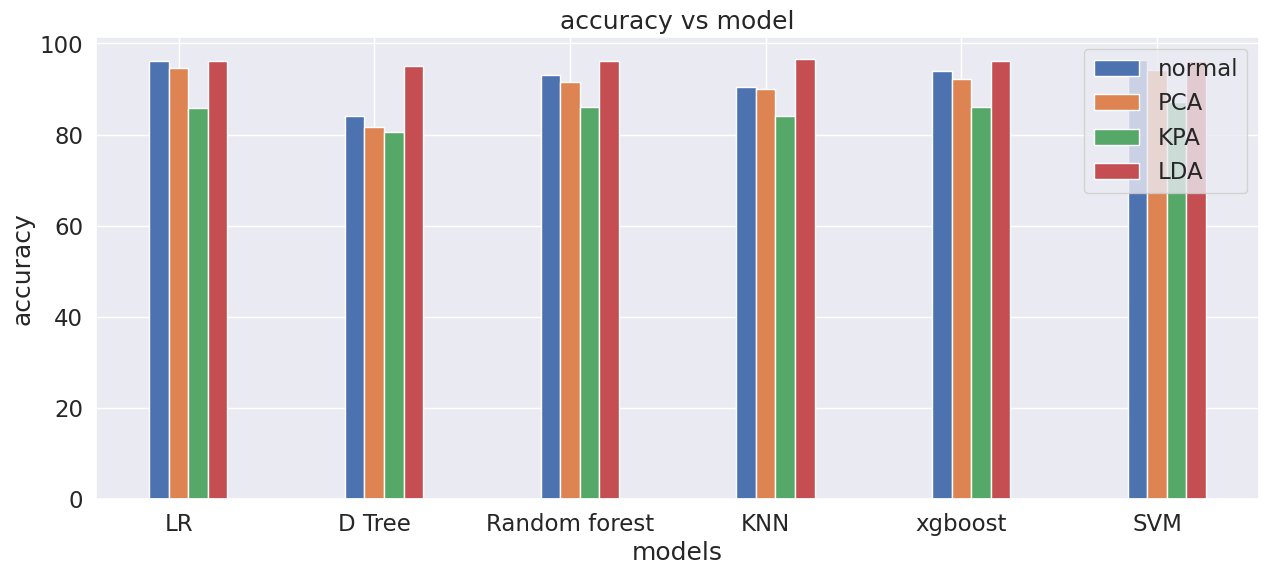

In [41]:
names = ['LR', 'D Tree', 'Random forest','KNN',"xgboost","SVM"]
categories = ['normal', 'PCA', 'KPA','LDA']
values = accuracy_mat

# Number of names and categories
num_names = len(names)
num_categories = len(categories)

# Set the width of each bar
bar_width = 0.1

# Position of bars on the x-axis
x = np.arange(num_names)
plt.figure(figsize=(15, 6))
# Create a bar for each category for each name
for i in range(num_categories):
    plt.bar(x + i * bar_width, [row[i] for row in values], bar_width, label=categories[i])

# Set labels, title, and legend
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy vs model')
plt.xticks(x + bar_width, names)
plt.legend()

# Show the plot

plt.show()




In [22]:
# plot countplot

In [23]:
# DEEP LEARNING MODELS

In [24]:
def Graph_Drawing(history, title):
    x = np.arange(len(history.history["val_accuracy"]))

    plt.plot(x, history.history["loss"], label="loss")
    plt.plot(x, history.history["val_loss"], label="val_loss")

    plt.plot(x, history.history["accuracy"], label="accuracy")
    plt.plot(x, history.history["val_accuracy"], label="val_accuracy")

    plt.title(title)

    plt.legend()

In [25]:
#ANN
ann_model=keras.Sequential(
[layers.Input(shape=561),
layers.Dense(100, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(6, activation="softmax")]
)
ann_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

ann_model.summary()

earlystopping = EarlyStopping(patience=30, monitor="val_accuracy", restore_best_weights=True)

ann_history = ann_model.fit(train_features, train_labels, epochs=100, callbacks = [earlystopping],validation_data=(test_features, test_labels) )




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               56200     
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 63,054
Trainable params: 63,054
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
230/230 [==============================] - 3s 9ms/step - loss: 0.4342 - accuracy: 0.8437 - val_loss: 0.2377 - val_accuracy: 0.8941
Epoch 2/100
230/230 [==============================] - 1s 5ms/step - loss: 0.1501 - accuracy: 0.9425 - val_loss: 0.1783 - val_accuracy: 0.9348
Epoch 3/100
230/230 [=========

93/93 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.9549


[0.18378183245658875, 0.9548693299293518]

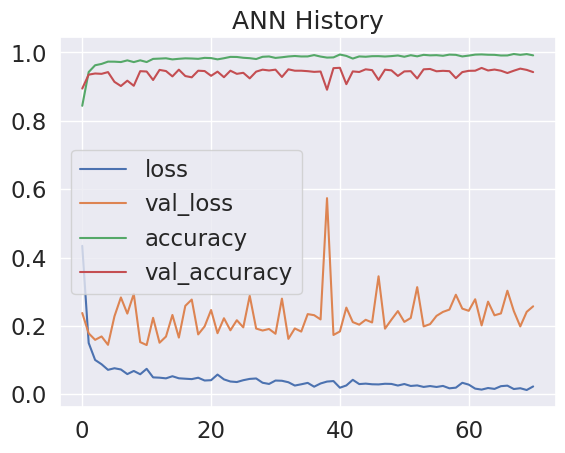

In [26]:
Graph_Drawing(ann_history, "ANN History")
ann_model.evaluate(test_features, test_labels)
